# Линейные методы в машинном обучении: самостоятельный проект

## Введение

**Описание исследования.**

Фермеру из компании молочного хозяйства "Вольный луг" необходимо расширить стадо коров. Для этого он просит создать модель машинного обучения, которая отберёт из стада таких коров, надой которых превышает 6000 кг молока в год, при этом необходимо чтобы надой был вкусным.

**Задачи исследования.**

Необходимо исследовать различные параметры коров для отбора нужных признаков и обучить на них модель машинного обучения.

Фермер из компании молочного хозяйства «Вольный луг» просит создать модель машинного обучения чтобы его коровы давали не меньше 6000 кг молока в год, при этом чтоб надой был вкусным.

*План исследования:*

***Часть 1. Загрузка данных и обзор общей информации***
* 1. Загрузка данных
* 2. Обзор данных и переименование столбцов

***Часть 2. Предобработка данных***
* 1. Поиск и обработка пропусков и дубликатов
* 2. Преобразование качественных признаков
    * 1. Датафрейм data_main
    * 2. Датафрейм data_dad
    * 3. Датафрейм data_buy
* 3. Преобразование количественных признаков

***Часть 3. Исследовательский анализ данных***
* 1. Количественные признаки
    * 1. Датафрейм data_main
    * 2. Датафрейм data_buy
* 2. Категориальные признаки
    * 1. Датафрейм data_main
    * 2. Датафрейм data_dad
    * 3. Датафрейм data_buy

***Часть 4. Корреляционный анализ***
* 1. Матрица корреляции
* 2. Диаграммы рассеивания
   * 1. ЭКЕ
   * 2. Сырой протеин
   * 3. СПО
   * 4. Жирность
   * 5. Белок  

***Часть 5. Обучение модели линейной регрессии***
* 1. Создание трёх модели линейной регрессии:
    * 1. Модель 1
    * 2. Модель 2
    * 3. Модель 3
* 2. Сравнение качества моделей, проверив R2 и остатки
* 3. Оценка качества каждой модели по трём метрикам: MSE, MAE, RMSE
* 4. Прогноз удоя коров

***Часть 6. Задача классификации***
* 1. Подготовка данных и создание модели логистической регрессии
* 2. Анализ модели
* 3. Прогноз вкуса молока

***Часть 7. Итоговые выводы***
* 1. Прогноз необходимого количества коров
* 2. Анализ модели линейной регрессии
* 3. Анализ модели логистической регрессии 

## Часть 1. Загрузка данных

### 1. Загрузка данных

Загрузим нужные библиотеки

In [1]:
#pandas для работы с датафреймами
import pandas as pd
#математические библиотеки
import phik
import math
import numpy as np
#графики
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#просто чтоб было
import datetime

Добавим константу RANDOM_STATE, которая понадобится нам далее.

In [2]:
RANDOM_STATE = 42

Проведём небольшой обзор исходных данных.

Загрузим файл ferma_name

In [3]:
try:
    data_main = pd.read_csv('ferma_main.csv', sep=';')
except:
    print('Ошибка в загрузке датафрейма, или неверно указан путь!')

In [4]:
data_main.head()

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

Ответ на вопрос, я думаю что в случае с онкологией пропуски необходимо оставить.

Загрузим файл ferma_dad

In [5]:
try:
    data_dad = pd.read_csv('ferma_dad.csv', sep=';')
except:
    print('Ошибка в загрузке датафрейма, или неверно указан путь!')
data_dad.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

Загрузим файл cov_buy

In [6]:
try:
    data_buy = pd.read_csv('cow_buy.csv', sep=';')
except:
    print('Ошибка в загрузке датафрейма, или неверно указан путь!')
data_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

### 2. Обзор данных и переименование столбцов

Переименуем столбцы в data_main с помощью змеиного индекса, для чего создадим словарь.

In [7]:
main_columns = {'Удой, кг': 'milk_yield', 'ЭКЕ (Энергетическая кормовая единица)': 'eau',
                                      'Сырой протеин, г': 'raw_protein', 'СПО (Сахаро-протеиновое соотношение)': 'spa',
                                     'Порода': 'breed', 'Тип пастбища': 'pasture_type', 'порода папы_быка': 'dad_breed',
                                     'Жирность,%': 'fat_contant', 'Белок,%': 'protein', 'Вкус молока': 'milk_taste',
                                     'Возраст': 'age'}

In [8]:
data_main = data_main.rename(columns=main_columns)

Рассмотрим данные этого датафрейма

In [9]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            634 non-null    int64 
 1   milk_yield    634 non-null    int64 
 2   eau           634 non-null    object
 3   raw_protein   634 non-null    int64 
 4   spa           634 non-null    object
 5   breed         634 non-null    object
 6   pasture_type  634 non-null    object
 7   dad_breed     634 non-null    object
 8   fat_contant   634 non-null    object
 9   protein       634 non-null    object
 10  milk_taste    634 non-null    object
 11  age           634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


Данные переименовались.

In [10]:
data_dad = data_dad.rename(columns={'Имя Папы': 'dad_name'})

In [11]:
data_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


В дф data_dad меньше строчек, чем в data_main, поэтому в будущем придётся оставить часть данных.

Заменим имена столбцов по аналогии в data_buy.

In [12]:
buy_columns = {'Порода': 'breed', 'Тип пастбища': 'pasture_type', 'порода папы_быка': 'dad_breed',
                                   'Имя_папы': 'dad_name', 'Текущая_жирность,%': 'fat_contant', 
                                   'Текущий_уровень_белок,%': 'protein', 'Возраст': 'age'}

In [13]:
data_buy = data_buy.rename(columns=buy_columns)

In [14]:
data_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   breed         20 non-null     object
 1   pasture_type  20 non-null     object
 2   dad_breed     20 non-null     object
 3   dad_name      20 non-null     object
 4   fat_contant   20 non-null     object
 5   protein       20 non-null     object
 6   age           20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Изучение первичных данных говорит о том, что данные загрузились правильно, пропусков нет. В data_buy всего 20 коров, часть из них не подходит.

## Часть 2.  Предобработка данных

### 1. Поиск и обработка пропусков и дубликатов

В первичных данных нет пропусков, следовательно необходимо проверить есть ли дубликаты.

Рассмотрим дф data_main.

Проверим таблицу на дубликаты.

In [15]:
duplicates_main = data_main[data_main.duplicated()]
duplicates_main

id  milk_yield   eau  raw_protein   spa            breed pasture_type  \
629  627        5970  14,4         1837  0,88  РефлешнСоверинг    Холмистое   
630  627        5970  14,4         1837  0,88  РефлешнСоверинг    Холмистое   
631  627        5970  14,4         1837  0,88  РефлешнСоверинг    Холмистое   
632  627        5970  14,4         1837  0,88  РефлешнСоверинг    Холмистое   
633  627        5970  14,4         1837  0,88  РефлешнСоверинг    Холмистое   

    dad_breed fat_contant protein milk_taste          age  
629   Соверин        3,64   3,075  не вкусно  более_2_лет  
630   Соверин        3,64   3,075  не вкусно  более_2_лет  
631   Соверин        3,64   3,075  не вкусно  более_2_лет  
632   Соверин        3,64   3,075  не вкусно  более_2_лет  
633   Соверин        3,64   3,075  не вкусно  более_2_лет

Избавимся от дубликатов.

In [16]:
data_main = data_main.drop_duplicates()
data_main = data_main.reset_index(drop=True)
data_main.head()

id  milk_yield   eau  raw_protein    spa            breed pasture_type  \
0   1        5863  14,2         1743   0,89   Вис Бик Айдиал    Равнинное   
1   2        5529  12,8         2138   0,89   Вис Бик Айдиал    Равнинные   
2   3        5810    14         1854  0,885  РефлешнСоверинг    Холмистое   
3   4        5895  12,4         2012  0,885  РефлешнСоверинг    Холмистое   
4   5        5302  12,8         1675  0,885   Вис Бик Айдиал    Равнинные   

  dad_breed fat_contant protein milk_taste          age  
0    Айдиал        3,58   3,076     вкусно  более_2_лет  
1   Соверин        3,54   3,079     вкусно  менее_2_лет  
2   Соверин        3,59   3,074  не вкусно  более_2_лет  
3    Айдиал         3,4   3,075  не вкусно  более_2_лет  
4   Соверин        3,73   3,073     вкусно  менее_2_лет

Проверим изменились ли типы переменных в таблице data_main.

In [17]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            629 non-null    int64 
 1   milk_yield    629 non-null    int64 
 2   eau           629 non-null    object
 3   raw_protein   629 non-null    int64 
 4   spa           629 non-null    object
 5   breed         629 non-null    object
 6   pasture_type  629 non-null    object
 7   dad_breed     629 non-null    object
 8   fat_contant   629 non-null    object
 9   protein       629 non-null    object
 10  milk_taste    629 non-null    object
 11  age           629 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.1+ KB


Видно, что тип столбцов переименовался. Стоит отметить, что теперь количество строк в data_main и data_dad стало одинаковым, поэтому добавление нового датафрейма не изменит

Проверим на дубликаты.

In [18]:
duplicates_dad = data_dad[data_dad.duplicated()]
duplicates_dad

Empty DataFrame
Columns: [id, dad_name]
Index: []

Дубликатов нет.

Остался только датафрейм data_buy, но его мы трогать не будем так как это тестовая выборка.

### 2. Преобразование категориальных признаков

Проверим есть ли повторяюшиеся значения в категориальных переменных.

#### Датафрейм data_main

Проверим столбец с породой.

In [19]:
data_main['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

В столбце порода повторяющихся значений нет, однако заменим породы на Айдал и Соверинг для удобства.

In [20]:
data_main.loc[data_main['breed'] == 'Вис Бик Айдиал', 'breed'] = 'Айдиал'
data_main.loc[data_main['breed'] == 'РефлешнСоверинг', 'breed'] = 'Соверинг'
data_main['breed'].unique()

array(['Айдиал', 'Соверинг'], dtype=object)

Проверим столбец с типом пастбища.

In [21]:
data_main['pasture_type'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

Заменим Равнинные на Равнинное

In [22]:
data_main.loc[data_main['pasture_type'] == 'Равнинные', 'pasture_type'] = 'Равнинное'
data_main['pasture_type'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

Проверим столбец с породой папы быка.

In [23]:
data_main['dad_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

Заменим Айдиалл на Айдиал

In [24]:
data_main.loc[data_main['dad_breed'] == 'Айдиалл', 'dad_breed'] = 'Айдиал'
data_main['dad_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Рассмотрим уникальные значения столбца вкус молока.

In [25]:
data_main['milk_taste'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

Переименуем названия.

In [26]:
data_main.loc[data_main['milk_taste'] == 'вкусно', 'milk_taste'] = 'Вкусно'
data_main.loc[data_main['milk_taste'] == 'не вкусно', 'milk_taste'] = 'Невкусно'
data_main['milk_taste'].unique()

array(['Вкусно', 'Невкусно'], dtype=object)

Так как уникальных значений всего два, добавим новый столбец milk_taste_bool где у параметра вкусно будет 1, а у параметра не вкусно 0.

Проделаем аналогичные действия со столбцом Возраст.

In [27]:
data_main['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Уберём подчёркивание из названий.

In [28]:
data_main.loc[data_main['age'] == 'более_2_лет', 'age'] = 'Более двух лет'
data_main.loc[data_main['age'] == 'менее_2_лет', 'age'] = 'Менее двух лет'
data_main['age'].unique()

array(['Более двух лет', 'Менее двух лет'], dtype=object)

#### Датафрейм data_buy

Проверим на уникальне значения столбец breed.

In [29]:
data_buy['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Переименуем аналогично действиям выше.

In [30]:
data_buy.loc[data_buy['breed'] == 'Вис Бик Айдиал', 'breed'] = 'Айдиал'
data_buy.loc[data_buy['breed'] == 'РефлешнСоверинг', 'breed'] = 'Соверинг'
data_buy['breed'].unique()

array(['Айдиал', 'Соверинг'], dtype=object)

Проверим на уникальные значения столбец pasture_type.

In [31]:
data_buy['pasture_type'].unique()

array(['холмистое', 'равнинное'], dtype=object)

Переименуем значения.

In [32]:
data_buy.loc[data_buy['pasture_type'] == 'холмистое', 'pasture_type'] = 'Холмистое'
data_buy.loc[data_buy['pasture_type'] == 'равнинное', 'pasture_type'] = 'Равнинное'
data_buy['pasture_type'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

In [33]:
data_buy['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [34]:
data_buy.loc[data_buy['age'] == 'более_2_лет', 'age'] = 'Более двух лет'
data_buy.loc[data_buy['age'] == 'менее_2_лет', 'age'] = 'Менее двух лет'
data_buy['age'].unique()

array(['Более двух лет', 'Менее двух лет'], dtype=object)

Проверим столбец имя папы.

In [35]:
data_buy['dad_name'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

Похожих значений нет.

### 3. Преобразование количественных признаков

Изменим тип некоторых данных, для чего ещё раз взглянем на тип данных таблиц data_main и data_buy

In [36]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            629 non-null    int64 
 1   milk_yield    629 non-null    int64 
 2   eau           629 non-null    object
 3   raw_protein   629 non-null    int64 
 4   spa           629 non-null    object
 5   breed         629 non-null    object
 6   pasture_type  629 non-null    object
 7   dad_breed     629 non-null    object
 8   fat_contant   629 non-null    object
 9   protein       629 non-null    object
 10  milk_taste    629 non-null    object
 11  age           629 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.1+ KB


In [37]:
data_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   breed         20 non-null     object
 1   pasture_type  20 non-null     object
 2   dad_breed     20 non-null     object
 3   dad_name      20 non-null     object
 4   fat_contant   20 non-null     object
 5   protein       20 non-null     object
 6   age           20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Рассмотрим уникальные значения некоторых строк типа object.

Некоторые значения имеют тип object, однако можно заметить, что это просто числа, разделённые запятой.

In [38]:
data_main['eau'].unique()

array(['14,2', '12,8', '14', '12,4', '12,7', '13,2', '14,7', '13,4',
       '13,7', '16,5', '15,4', '14,5', '16', '15,6', '11,5', '15,7',
       '14,3', '15,5', '14,6', '15,9', '15,2', '14,8', '16,4', '11,8',
       '14,4', '16,1', '12,9', '13,8', '13,3', '16,3', '13,9', '14,1',
       '16,7', '15,8', '16,2', '12,2', '14,9', '13,6', '12,5', '16,8',
       '13,5', '15,1', '12,1', '16,6', '15,3', '13,1', '12,3', '11,9',
       '12,6', '15', '13', '12', '11,1', '11,7', '10,9'], dtype=object)

Видно, что данные заполнялись через запятую, следовательно необходимо для каждого столбца поменять запятые на точку и превести к типу float.

Создадим функцию для замены.

In [39]:
def to_dot(data):
    try:
        data_str = data.str.replace(',', '.')
        try:
            return data_str.astype('float64')
        except:
            return data
    except:
        return data

Применим эту функцию к датафрейму data_main.

In [40]:
data_main = data_main.apply(to_dot)
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            629 non-null    int64  
 1   milk_yield    629 non-null    int64  
 2   eau           629 non-null    float64
 3   raw_protein   629 non-null    int64  
 4   spa           629 non-null    float64
 5   breed         629 non-null    object 
 6   pasture_type  629 non-null    object 
 7   dad_breed     629 non-null    object 
 8   fat_contant   629 non-null    float64
 9   protein       629 non-null    float64
 10  milk_taste    629 non-null    object 
 11  age           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


Поступим аналогично с data_buy.

In [41]:
data_buy = data_buy.apply(to_dot)
data_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   pasture_type  20 non-null     object 
 2   dad_breed     20 non-null     object 
 3   dad_name      20 non-null     object 
 4   fat_contant   20 non-null     float64
 5   protein       20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


## Часть 3. Исследовательский анализ данных

Построим гистограммы и графики для всех признаков

### 1. Количественные признаки

#### Датафрейм data_main

##### Удой

Построим гистограмму и ящик с усами для удоя.

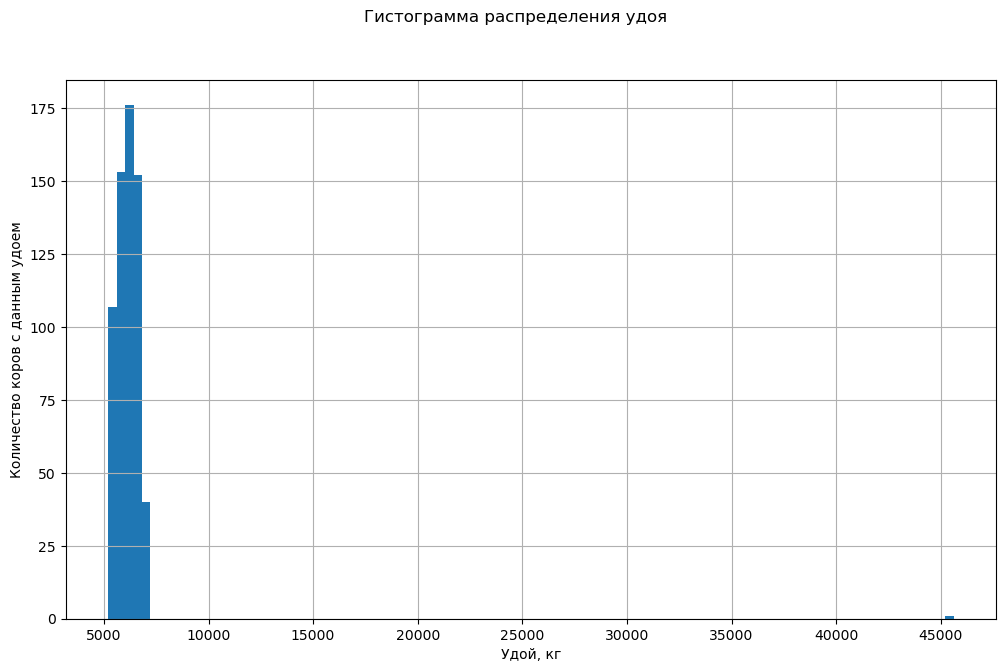

In [42]:
ax = data_main['milk_yield'].hist(
    bins=100, 
    figsize=(12,7),
    grid=True
)
ax.set_xlabel('Удой, кг')
ax.set_ylabel('Количество коров с данным удоем')
plt.suptitle('Гистограмма распределения удоя');

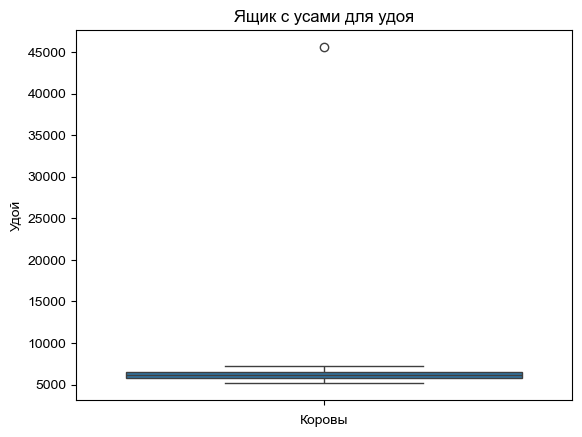

In [43]:
(sns.boxplot(data=data_main, y='milk_yield')
 .set_title('Ящик с усами для удоя'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.ylabel('Удой')
plt.xlabel('Коровы');

Виднеется выброс больше 45000, избавимся от него.

In [44]:
data_main = data_main.query('milk_yield < 45000')

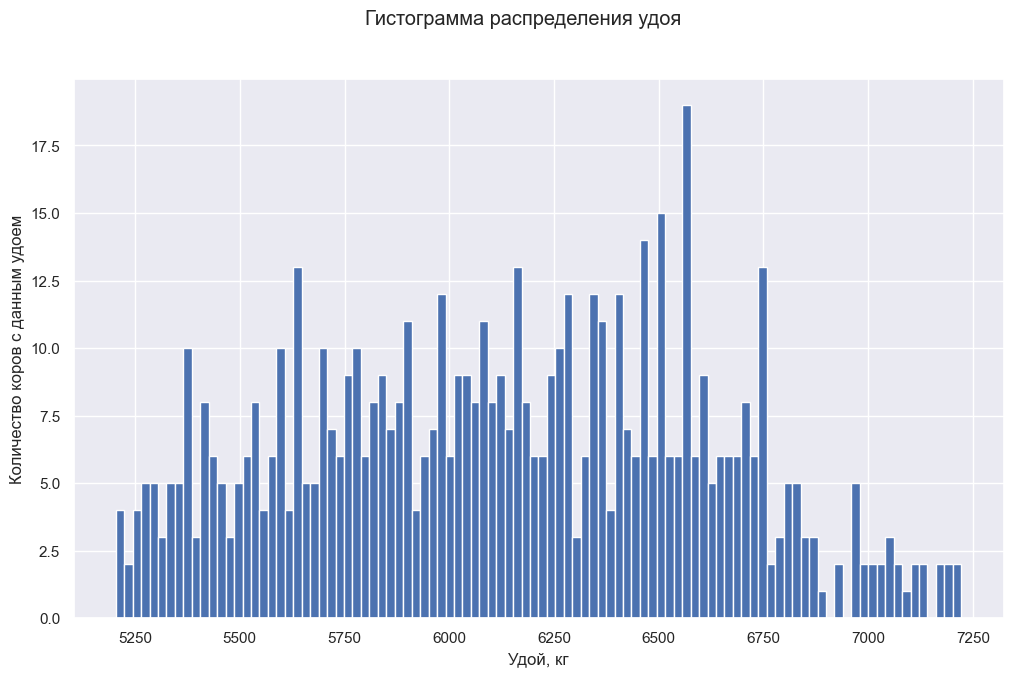

In [45]:
ax = data_main['milk_yield'].hist(
    bins=100, 
    figsize=(12,7),
    grid=True
)
ax.set_xlabel('Удой, кг')
ax.set_ylabel('Количество коров с данным удоем')
plt.suptitle('Гистограмма распределения удоя');

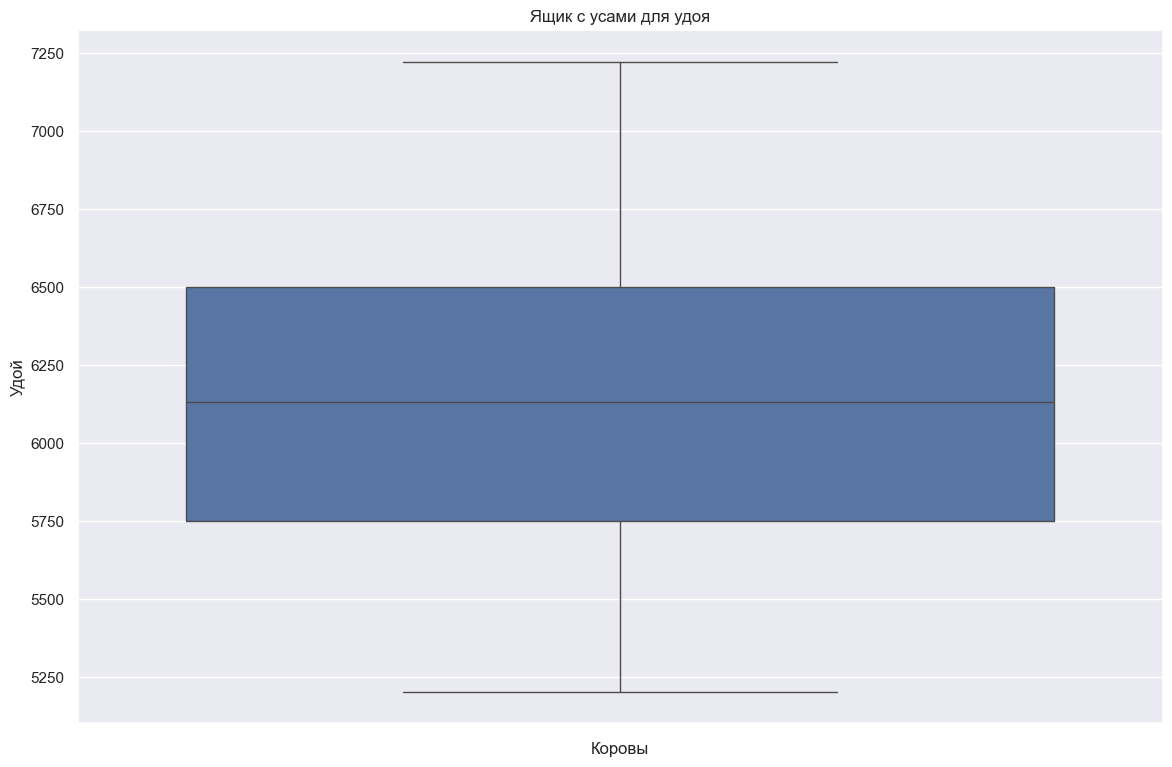

In [46]:
(sns.boxplot(data=data_main, y='milk_yield')
 .set_title('Ящик с усами для удоя'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.ylabel('Удой')
plt.xlabel('Коровы');

На гистограмме видны столбики, это объясняется тем что значение удоя заполняется дискретно. С 5250 до 7000 кг молока в год на гистограмме кажется почти одинаковым с незначительными выбросами, однако ящик с усами показывает, что значение удоя между первым и третьим квартилем находится в промежутке от 5750 до 6500 кг в год.

Изучим столбец с помощью метода describe().

In [47]:
data_main['milk_yield'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield, dtype: float64

Пик гистограммы показывает, что пик коров дают молока примерно на 6550 кг, с 5750 до 6500 удой примерно одинаковый, видно возрастание c 5204 до 5750, спад наблюдается от 6750 до 7250, аномалий нет.

##### ЭКЕ

Построим гистограмму и ящик с усами для ЭКЕ.

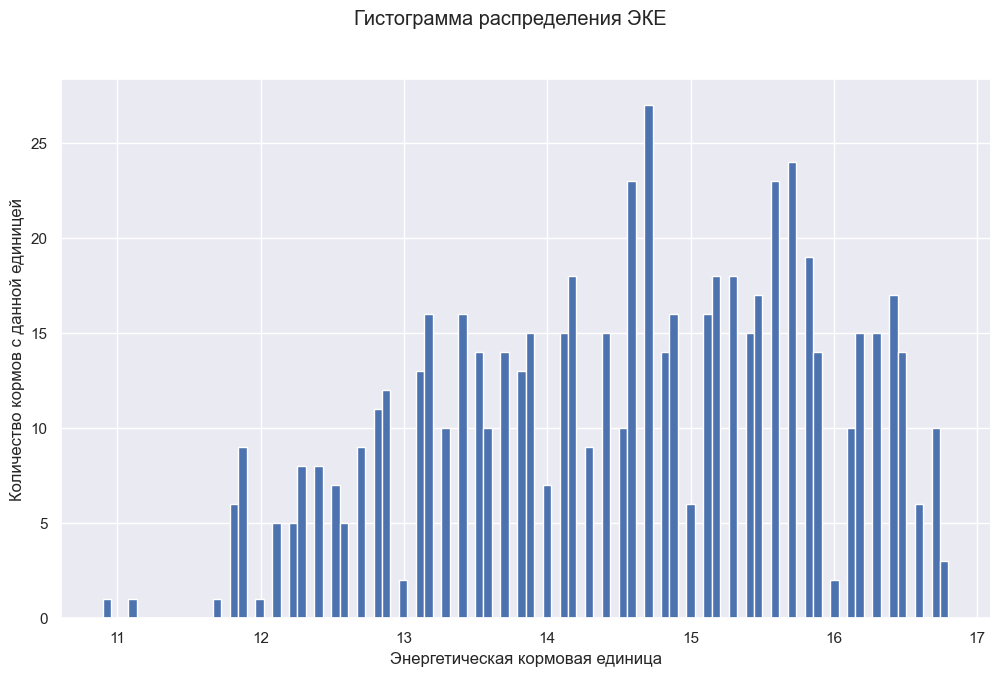

In [48]:
ax = data_main['eau'].hist(
    bins=100, 
    figsize=(12,7),
    grid=True
)
ax.set_xlabel('Энергетическая кормовая единица')
ax.set_ylabel('Количество кормов с данной единицей')
plt.suptitle('Гистограмма распределения ЭКЕ');

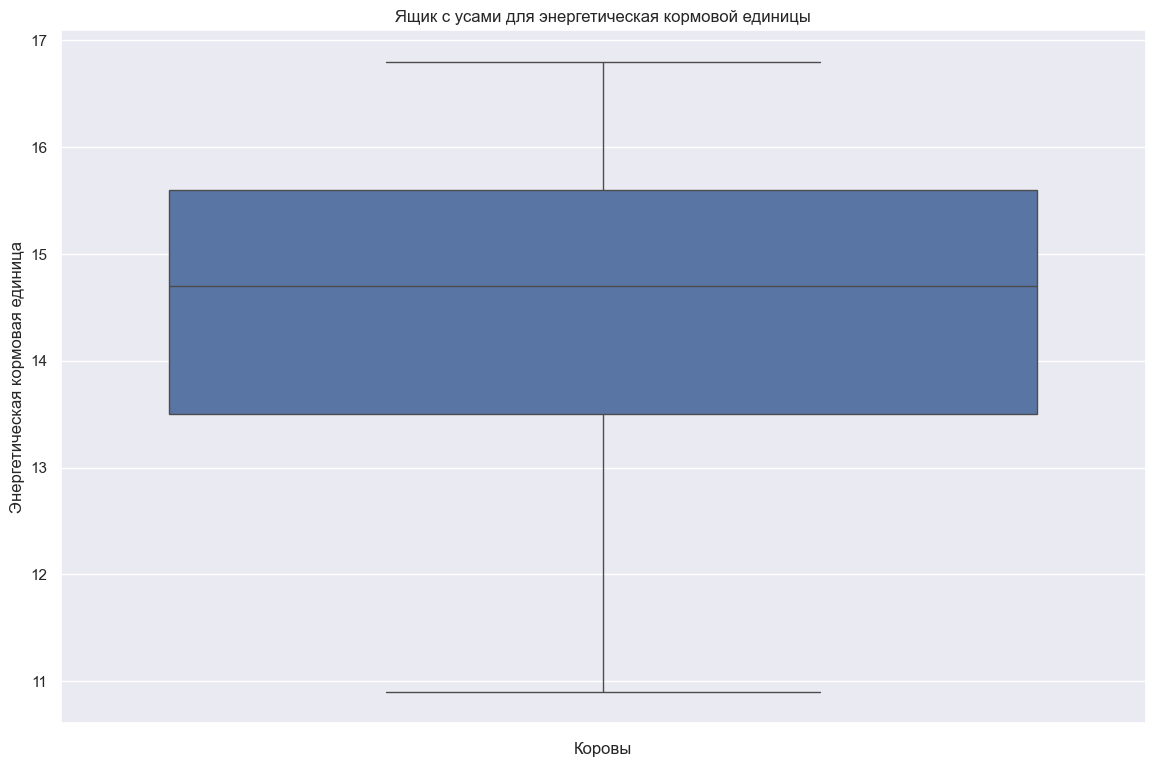

In [49]:
(sns.boxplot(data=data_main, y='eau')
.set_title('Ящик с усами для энергетическая кормовой единицы'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.ylabel('Энергетическая кормовая единица')
plt.xlabel('Коровы');

На гистограмме видны аномальные значения около 11, рассмотрим столбец с ЭКЕ с помощью метода describe.

In [50]:
data_main['eau'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: eau, dtype: float64

Гистограмма показывает, что значения ЭКМ дискретны, виден подъём от 11,5 до 13, с 13 до 14,5 график показывает примерно одинаковые значения, пик приходится на 14,7, далее ещё один пик примерно у 15,7, далее идёт спад.

##### Сырой протеин, г

Построим гистограмму и ящик с усами для сырого протеина.

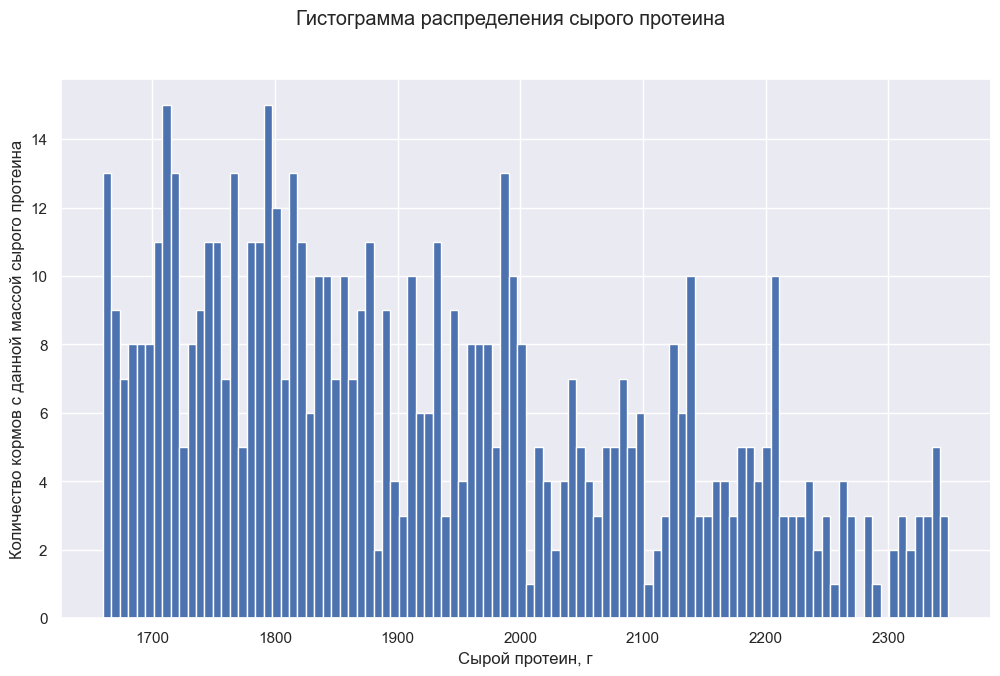

In [51]:
ax = data_main['raw_protein'].hist(
    bins=100, 
    figsize=(12,7),
    grid=True
)
ax.set_xlabel('Сырой протеин, г')
ax.set_ylabel('Количество кормов с данной массой сырого протеина')
plt.suptitle('Гистограмма распределения сырого протеина');

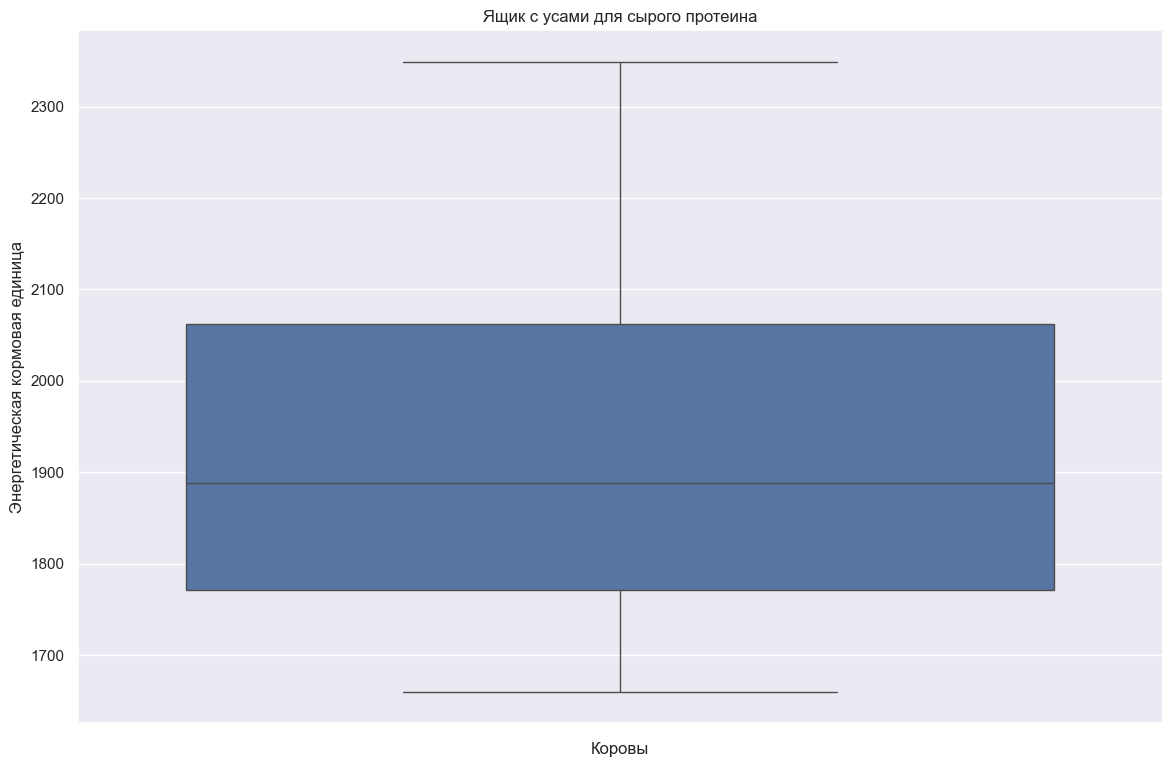

In [52]:
(sns.boxplot(data=data_main, y='raw_protein')
.set_title('Ящик с усами для сырого протеина'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.ylabel('Энергетическая кормовая единица')
plt.xlabel('Коровы');

Проверим с помощью метода describe().

In [53]:
data_main['raw_protein'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein, dtype: float64

Гистограмма показывает, что распределение похоже на распределение Пуассона, где видно два пика у 1700 и 1800, после идёт спад. На гистограмме видно, что аномалий нет.

##### СПО

Построим гистограмму и ящик с усами для СПО.

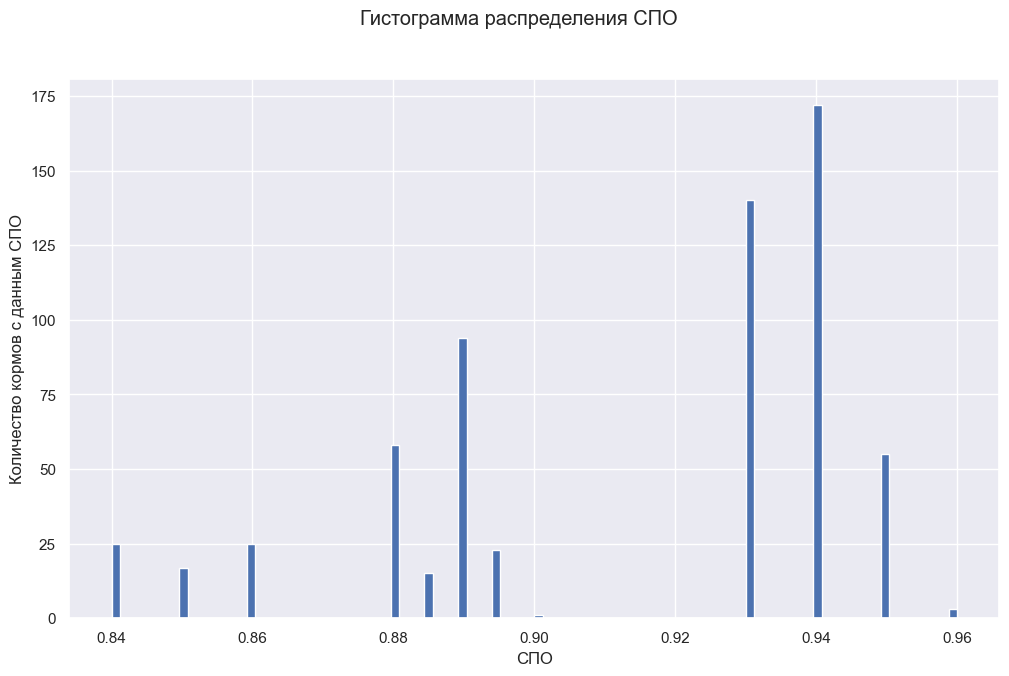

In [54]:
ax = data_main['spa'].hist(
    bins=100, 
    figsize=(12,7),
    grid=True
)
ax.set_xlabel('СПО')
ax.set_ylabel('Количество кормов с данным СПО')
plt.suptitle('Гистограмма распределения СПО');

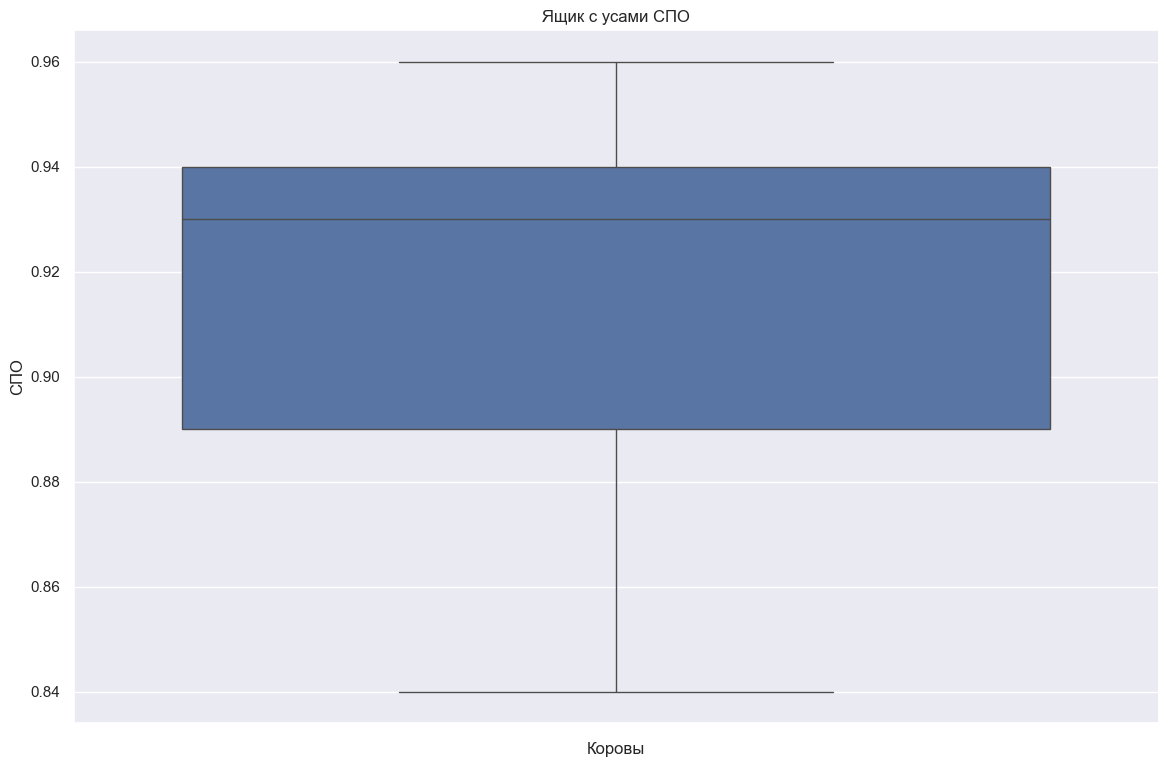

In [55]:
(sns.boxplot(data=data_main, y='spa')
.set_title('Ящик с усами СПО'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.ylabel('СПО')
plt.xlabel('Коровы');

Проверим методом describe().

In [56]:
data_main['spa'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spa, dtype: float64

Гистограмма показывает, что распределение дискретно, минимальное значение у 0,84 и 0,86, далее рост от 0,88 до 0,9, пик на значении 0,94, аномалий нет.

Создадим новый категориальный признак для СПО, разделив его на низкий, средний и высокий согласно граффику.

Создадим функцию, которую потом применим к столбцу.

Создадим новый столбец spa_cat_three

In [57]:
data_main['spa_cat_three'] = data_main['spa'].apply(lambda x: 'Меньше 0.87' if x<0.87 else 'От 0.87 до 0.9' 
                                              if x>0.87 and x<0.91 else 'Больше 0.9' ) 

In [58]:
data_main['spa_cat_three'].unique()

array(['От 0.87 до 0.9', 'Больше 0.9', 'Меньше 0.87'], dtype=object)

##### Жирность,%

Построим гистограмму и ящик с усами для жирности.

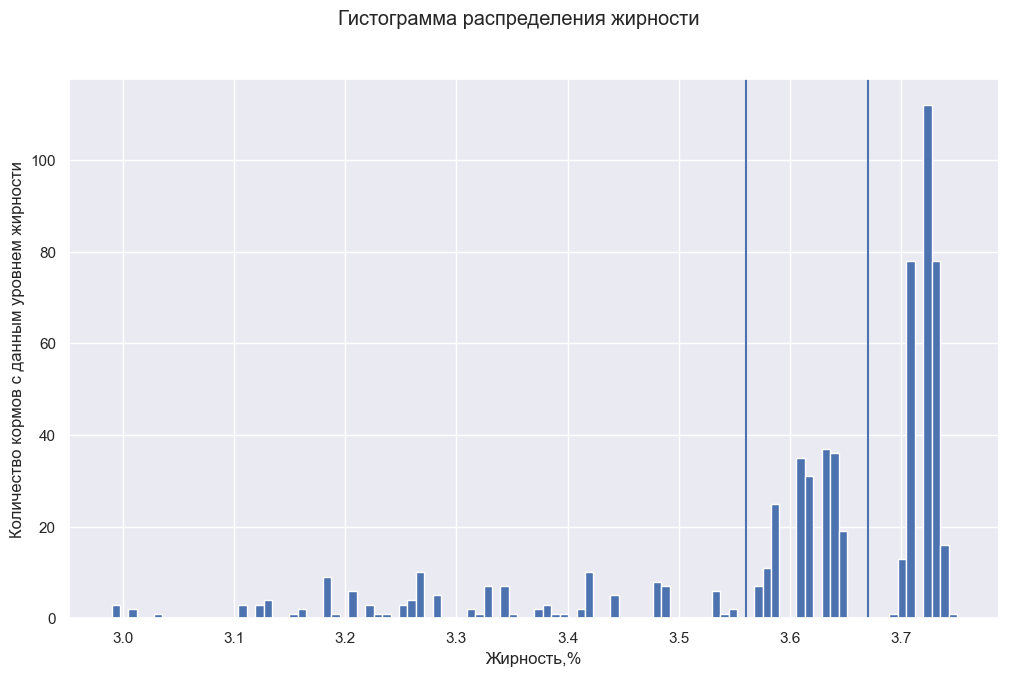

In [59]:
ax = data_main['fat_contant'].hist(
    bins=100, 
    figsize=(12,7),
    grid=True
)
plt.axvline(x=3.56) #Добавим разделители для корректного деления жирности по категориям
plt.axvline(x=3.67)
ax.set_xlabel('Жирность,%')
ax.set_ylabel('Количество кормов с данным уровнем жирности')
plt.suptitle('Гистограмма распределения жирности');

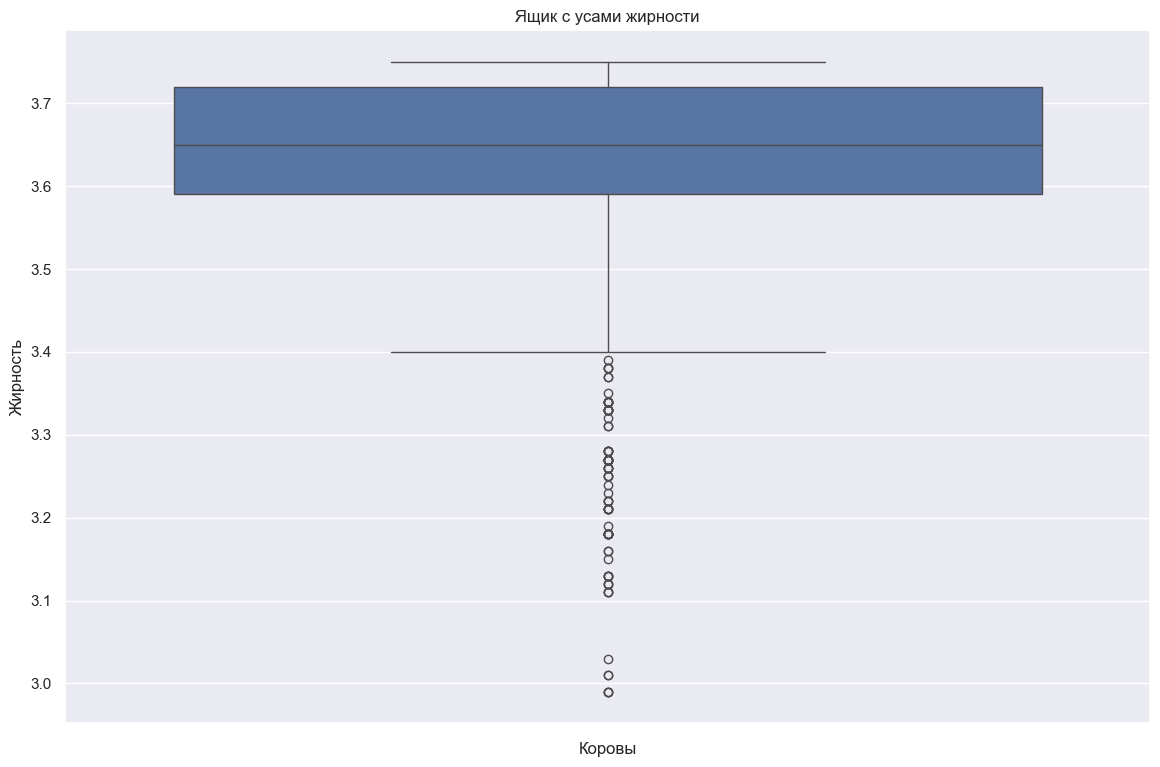

In [60]:
(sns.boxplot(data=data_main, y='fat_contant')
.set_title('Ящик с усами жирности'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.ylabel('Жирность')
plt.xlabel('Коровы');

Рассмотрим данный столбец с помощью метода describe

In [61]:
data_main['fat_contant'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_contant, dtype: float64

Ящик с усами показывает, что жирность ниже 3.4% это выбросы, однако жирность в коровьем молоке может быть от 2.7% до 6%, следовательно выбросы нельзя считать выбросами, так как это соответствует реальности.

Категоризируем жирность по аналогии с СПО.

In [62]:
data_main['fat_contant_cat'] = data_main['fat_contant'].apply(lambda x: 'Меньше 3.56' if x<3.56 else 'От 3.56 до 3.67'
                                                             if x >= 3.56 and x < 3.67 else 'Больше 3.67')
data_main['fat_contant_cat'].unique()

array(['От 3.56 до 3.67', 'Меньше 3.56', 'Больше 3.67'], dtype=object)

Как и в случае СПО значения жирности дискретны, аномалий нет. 

##### Белок,%

Построим гистограмму и ящик с усами для белка.

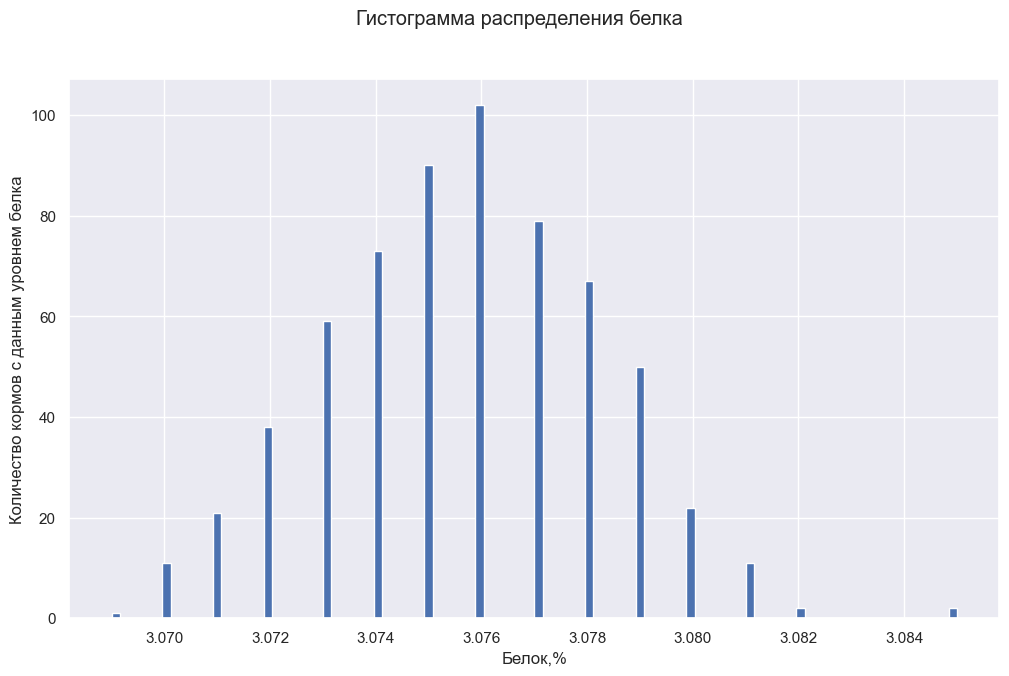

In [63]:
ax = data_main['protein'].hist(
    bins=100, 
    figsize=(12,7),
    grid=True
)
ax.set_xlabel('Белок,%')
ax.set_ylabel('Количество кормов с данным уровнем белка')
plt.suptitle('Гистограмма распределения белка');

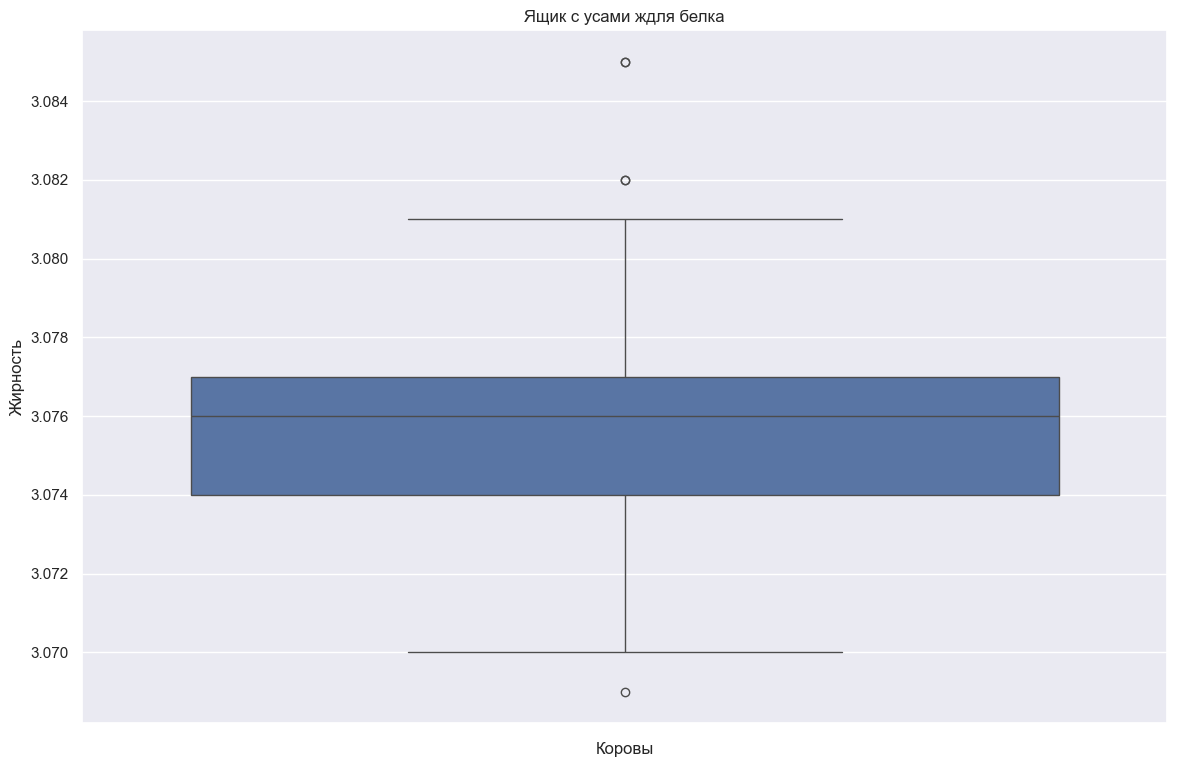

In [64]:
(sns.boxplot(data=data_main, y='protein')
.set_title('Ящик с усами ждля белка'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.ylabel('Жирность')
plt.xlabel('Коровы');

Виднеется аномальное значениу выше 3.084, рассмотрим столбец с помощью метода describe

In [65]:
data_main['protein'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

Гистограмма показывает, что распределение дискретно, пик на значении 3,076, аномалий нет.

#### Датафрейм data_buy

In [66]:
data_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   pasture_type  20 non-null     object 
 2   dad_breed     20 non-null     object 
 3   dad_name      20 non-null     object 
 4   fat_contant   20 non-null     float64
 5   protein       20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


##### Жирность,%

Построим гистограмму и ящик с усами для текущей жирности.

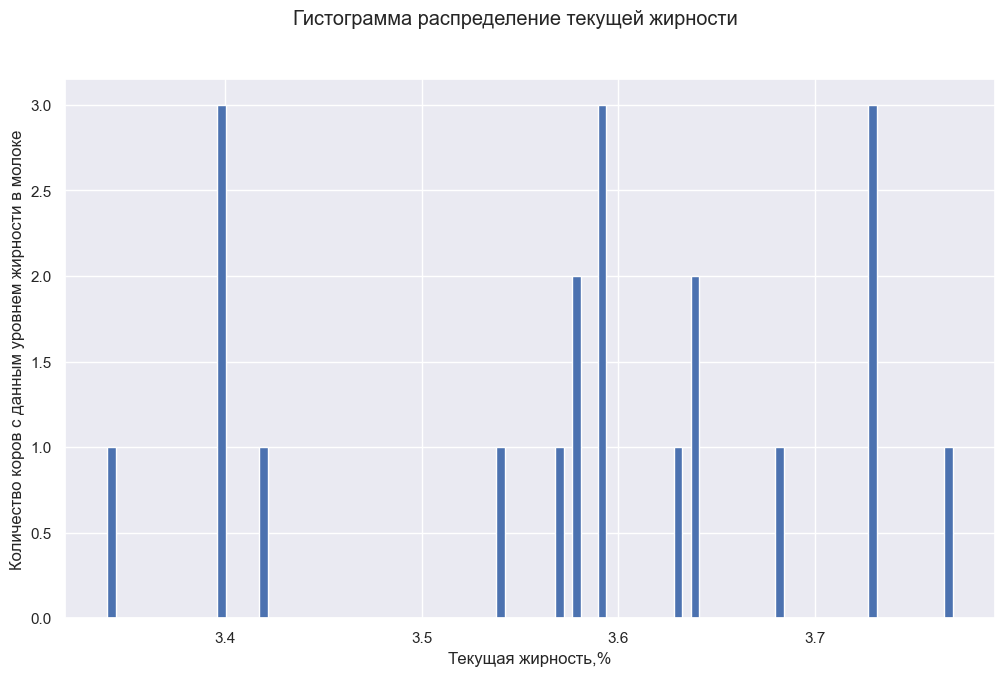

In [67]:
ax = data_buy['fat_contant'].hist(
    bins=100, 
    figsize=(12,7),
    grid=True
)
ax.set_xlabel('Текущая жирность,%')
ax.set_ylabel('Количество коров с данным уровнем жирности в молоке')
plt.suptitle('Гистограмма распределение текущей жирности');

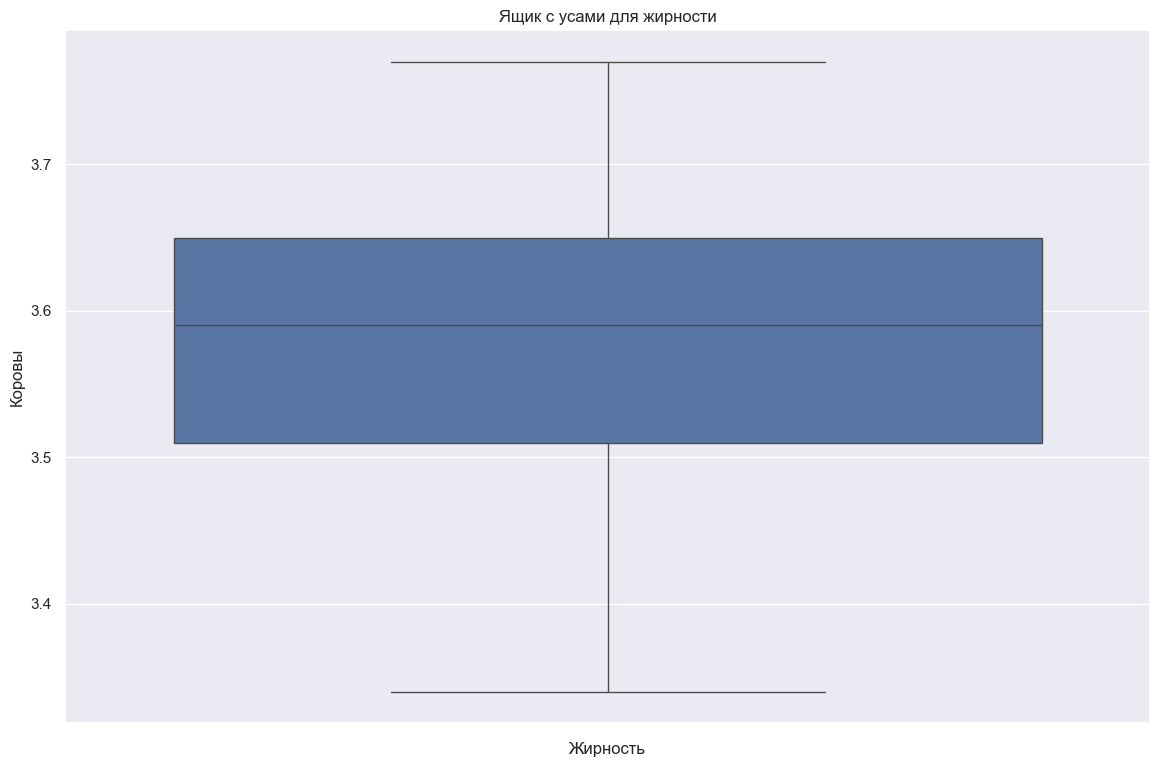

In [68]:
(sns.boxplot(data=data_buy, y='fat_contant')
.set_title('Ящик с усами для жирности'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.xlabel('Жирность')
plt.ylabel('Коровы');

Гистограмма показывает, что значения дискретны, больше всего коров с жирностью 3.4% и 3.73%, в остальном жирность одинакова.

Разделим жирность по категориям.

In [69]:
data_buy['fat_contant_cat'] = data_buy['fat_contant'].apply(lambda x: 'Меньше 3.56' if x<3.56 else 'От 3.56 до 3.67'
                                                             if x >= 3.56 and x < 3.67 else 'Больше 3.67')
data_buy['fat_contant_cat'].unique()

array(['От 3.56 до 3.67', 'Меньше 3.56', 'Больше 3.67'], dtype=object)

##### Белок,%

Построим гистограмму и ящик с усами для текущего уровня белка.

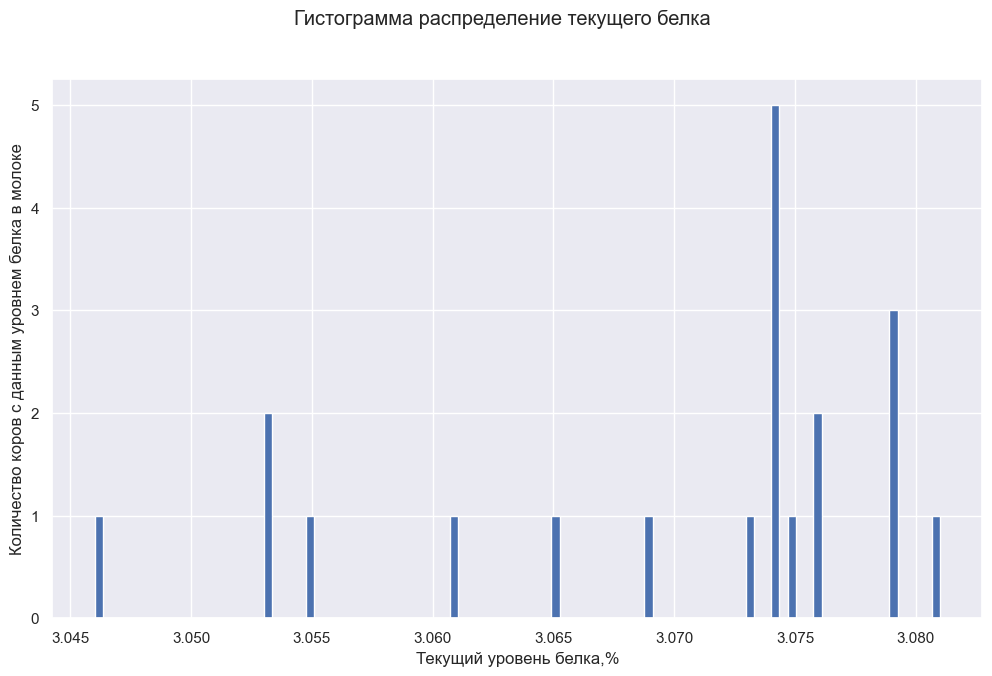

In [70]:
ax = data_buy['protein'].hist(
    bins=100, 
    figsize=(12,7),
    grid=True
)
ax.set_xlabel('Текущий уровень белка,%')
ax.set_ylabel('Количество коров с данным уровнем белка в молоке')
plt.suptitle('Гистограмма распределение текущего белка');

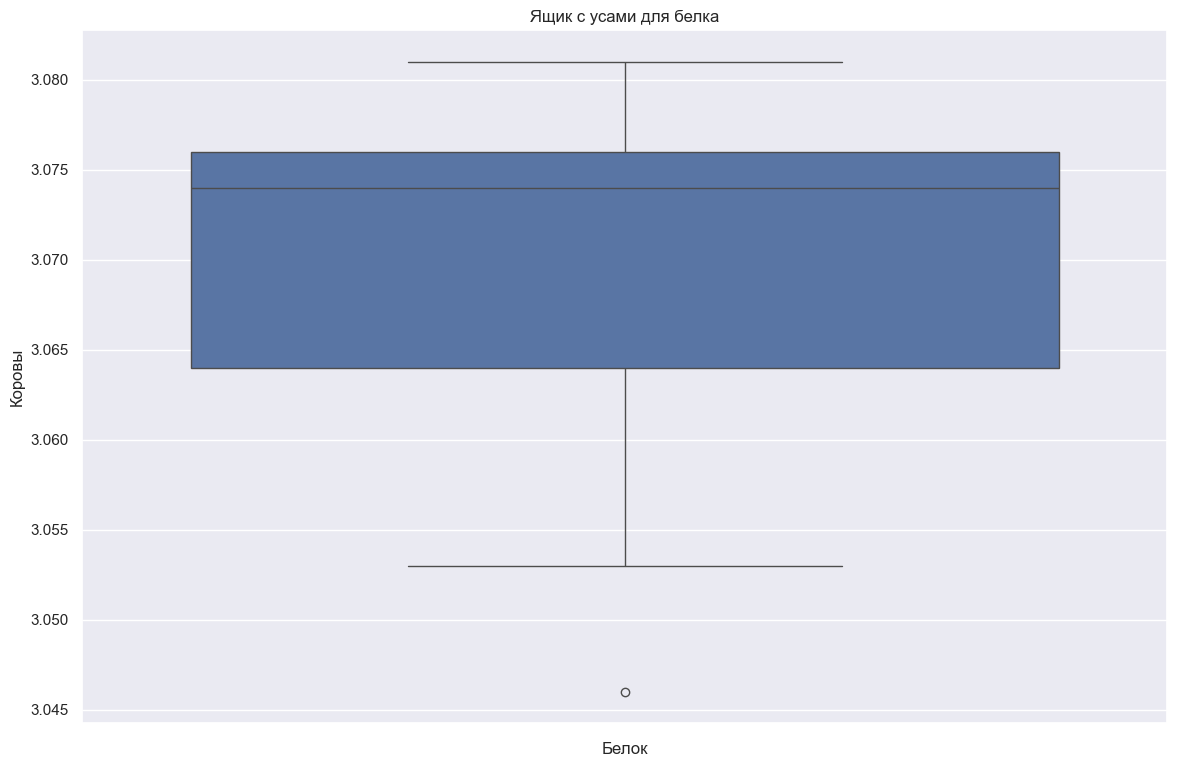

In [71]:
(sns.boxplot(data=data_buy, y='protein')
.set_title('Ящик с усами для белка'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.xlabel('Белок')
plt.ylabel('Коровы');

Как и в случае с текущем уровнем жидкости значения текущего уровня белка дискретны.

### 2. Категориальные признаки

#### Датафрейм data_main

Создадим список cat_sign_main для категориальных признаков.

In [72]:
cat_sign_main = ['breed', 'pasture_type', 'dad_breed', 'milk_taste', 'age']

Поменяем местами ключи и значения в словаре который использовался для переименовывания столбцов.

In [73]:
main_columns_inv = {k: v for v, k in main_columns.items()}
main_columns_inv

{'milk_yield': 'Удой, кг',
 'eau': 'ЭКЕ (Энергетическая кормовая единица)',
 'raw_protein': 'Сырой протеин, г',
 'spa': 'СПО (Сахаро-протеиновое соотношение)',
 'breed': 'Порода',
 'pasture_type': 'Тип пастбища',
 'dad_breed': 'порода папы_быка',
 'fat_contant': 'Жирность,%',
 'protein': 'Белок,%',
 'milk_taste': 'Вкус молока',
 'age': 'Возраст'}

Создадим функцию, которая строит графики категориальных признаков

In [74]:
def get_graphs(data, cat_sign): #data - датафрейм, cat_sign - категориальный признак
    plt.pie(data[cat_sign].value_counts(), labels=data[cat_sign].unique(), radius=1)

Построим круговые диаграммы для каждого признака.

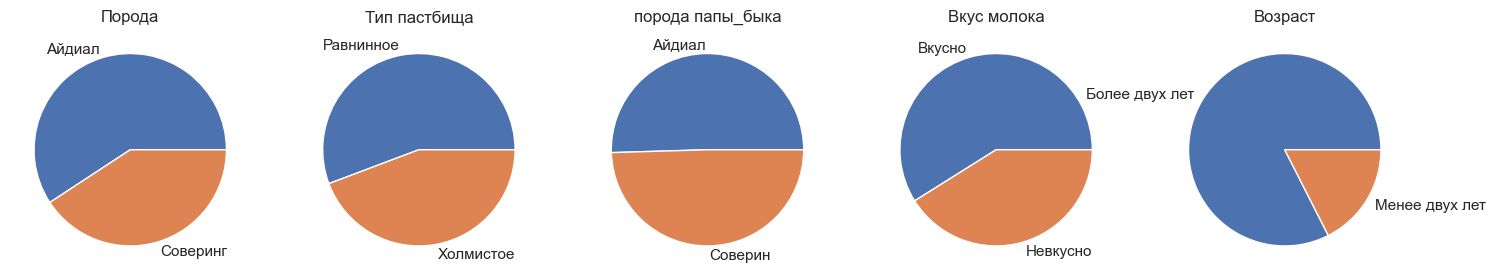

In [75]:
plt.figure(figsize=[18, 12])

for i, sign in enumerate(cat_sign_main):
    plt.subplot(1, len(cat_sign_main), i+1)
    get_graphs(data_main, sign)
    plt.title(main_columns_inv[sign])
plt.suptitle('');

Скорее всего при дисбалансе модель будет давать больше прогнозов "вкусно", однако что-то сделать тут для баланса мы не в силах.

График породы показывает, что породы Вис Бик Айдал больше, чем Рефлешн Соверинг. В типе пастбища преобладает равнинное. Породы отцов примерно одинаковые. Вкусного молока больше чем невкусного. Большинство коров более двух лет.

#### Датафрейм data_dad

Рассмотрим имена отцов.

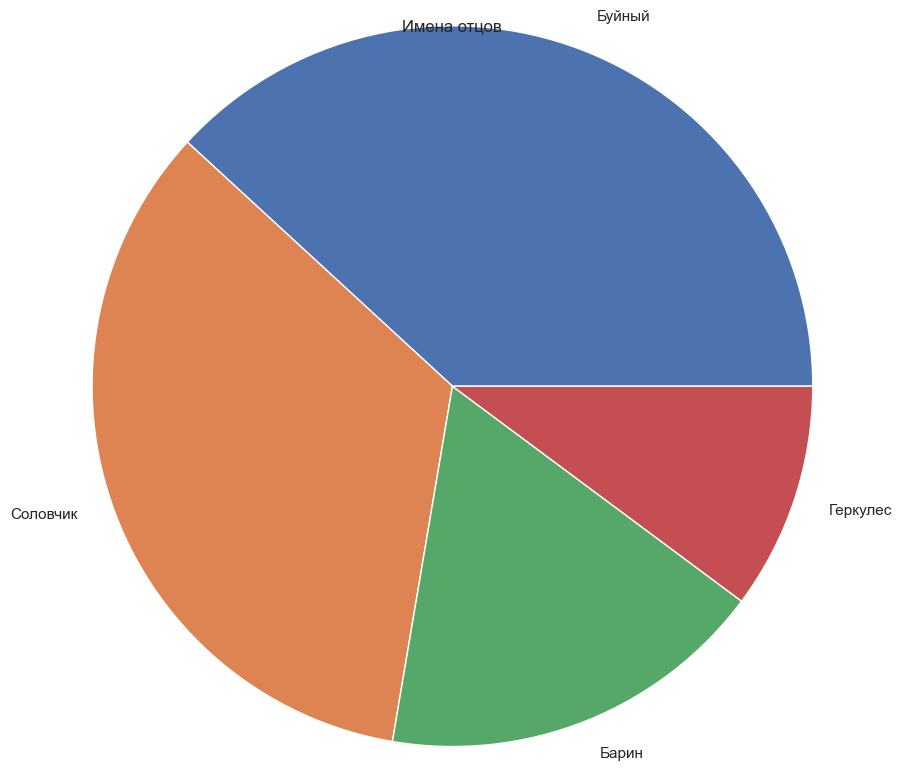

In [76]:
plt.pie(data_dad['dad_name'].value_counts(), labels=data_dad['dad_name'].unique(), radius=1.3)
plt.title('Имена отцов');

Больше всего детей у Соловчика и буйного, меньше у Барина и Геркулеса.

#### Датафрейм data_buy

Поступим аналогично действиям выше.

In [77]:
cat_signs_buy = ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'age']

In [78]:
buy_columns_inv = {k: v for v, k in buy_columns.items()}
buy_columns_inv

{'breed': 'Порода',
 'pasture_type': 'Тип пастбища',
 'dad_breed': 'порода папы_быка',
 'dad_name': 'Имя_папы',
 'fat_contant': 'Текущая_жирность,%',
 'protein': 'Текущий_уровень_белок,%',
 'age': 'Возраст'}

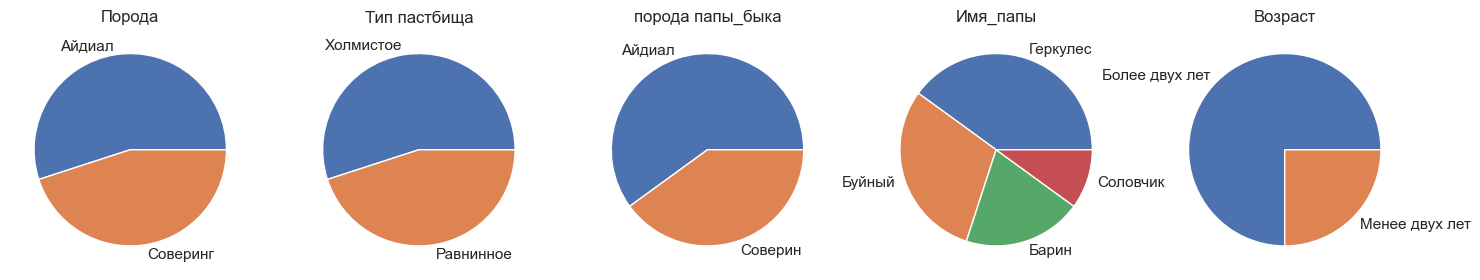

In [79]:
plt.figure(figsize=[18, 12])

for i, sign in enumerate(cat_signs_buy):
    plt.subplot(1, len(cat_signs_buy), i+1)
    get_graphs(data_buy, sign)
    plt.title(buy_columns_inv[sign])
plt.suptitle('');

## Часть 4. Корреляционный анализ

### 1. Матрица корреляции

Построим матрицу корреляции для всех признаков.

In [80]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 628
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               628 non-null    int64  
 1   milk_yield       628 non-null    int64  
 2   eau              628 non-null    float64
 3   raw_protein      628 non-null    int64  
 4   spa              628 non-null    float64
 5   breed            628 non-null    object 
 6   pasture_type     628 non-null    object 
 7   dad_breed        628 non-null    object 
 8   fat_contant      628 non-null    float64
 9   protein          628 non-null    float64
 10  milk_taste       628 non-null    object 
 11  age              628 non-null    object 
 12  spa_cat_three    628 non-null    object 
 13  fat_contant_cat  628 non-null    object 
dtypes: float64(4), int64(3), object(7)
memory usage: 73.6+ KB


In [81]:
quant_list_for_matrix = ['milk_yield', 'eau', 'raw_protein', 'spa', 'fat_contant', 'protein']

C:\Users\igsto\anaconda3\Lib\site-packages\phik\phik.py:150: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


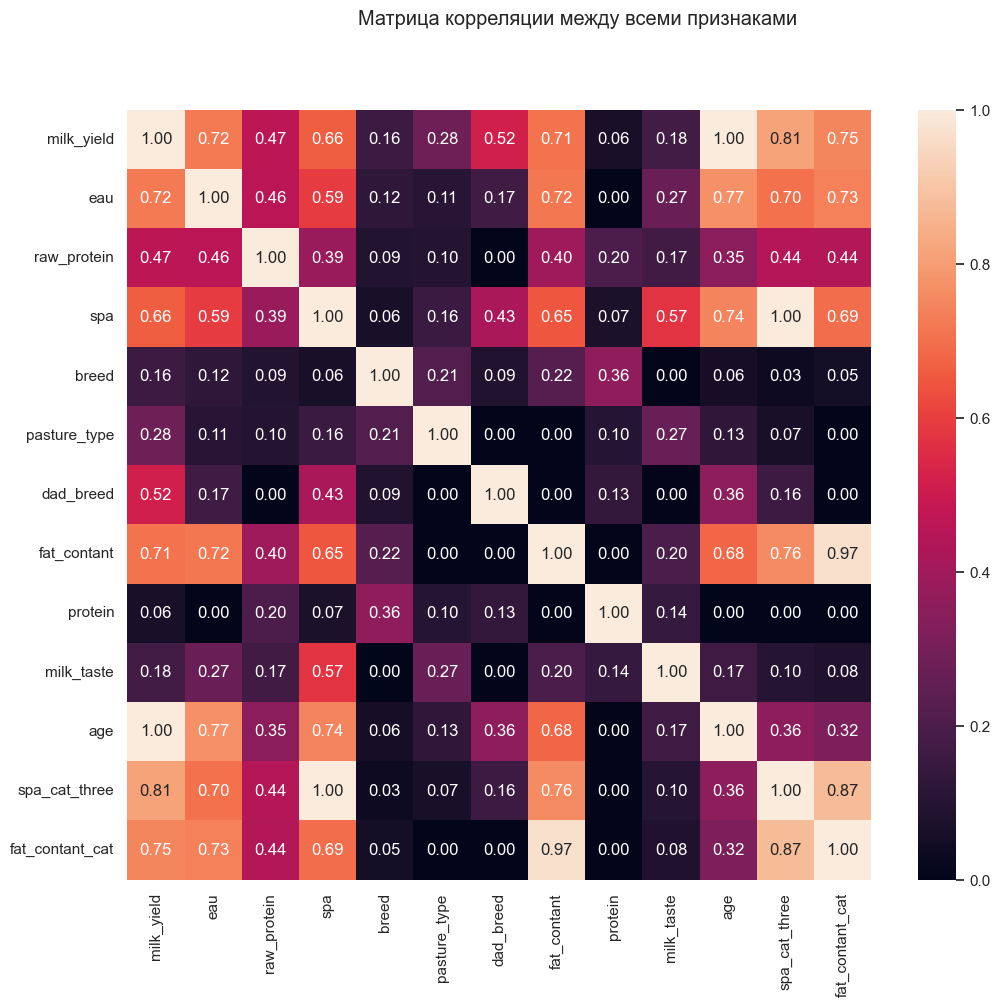

In [82]:
cm1 = data_main.drop('id', axis=1).phik_matrix(interval_cols=quant_list_for_matrix)

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции между всеми признаками')
sns.heatmap(cm1, annot=True, fmt='.2f');

Посмотрим есть ли между какими-то признаками высокая корреляция, для чего сделаем так чтоб корреляция ниже 0.6 отображалась на хитмэпе чёрным цветом. Отбросим количественные признаки, которые мы перевели в категориальные.

C:\Users\igsto\anaconda3\Lib\site-packages\phik\phik.py:150: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


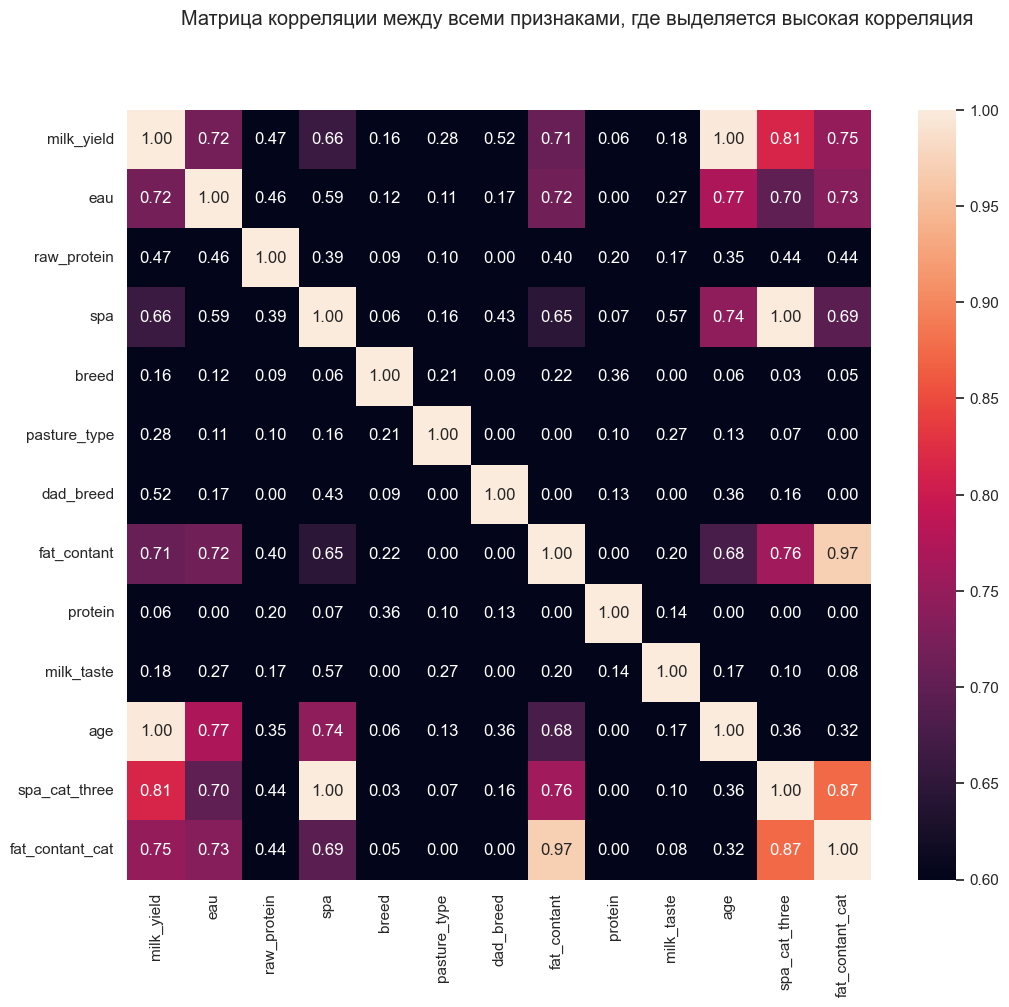

In [83]:
cm2 = data_main.drop(['id'], axis=1).phik_matrix(interval_cols=quant_list_for_matrix)

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции между всеми признаками, где выделяется высокая корреляция')
sns.heatmap(cm2, annot=True, fmt='.2f', vmin=0.6, vmax=1);

Видно что есть высокая корреляция удоя с ЭКЕ, возрастом, категориальным СПО и категориальной жирностью. Ещё видно, что между некоторыми признаками есть высокая корреляция, это может привести к мультиколлинеарности. Пока рано делать выводы о том, как мы будем составлять модель линейной регрессии, каждый признак необходимо будет разобрать, что я сделаю когда перейду непосредственно к составлении модели. 

Построим хитмэп в качестве матрицы корреляции.

In [84]:
#plt.figure(figsize=[12, 10])
#sns.heatmap(data_main_num.corr(), annot=True, fmt='.2f');

### 2. Диаграмма рассеяния

Для диаграммы рассеяния исключим из таблицы количественных признаков признак удой.

Создадим функцию, которая будет строить диаграммы рассеяния признака удой и остальных количественных признаков, разбивая подгруппы на качественные, ещё добавим корреляцию признака с удоем.

In [85]:
def create_gpaph(data, quant_sign, cat_sign, cat_sign_dic): #data - датафрейм, quant_sign - качественный признак
                                                            #cat_sign - список категориальных признаков, cat_sign_dic - словарь
                                                            #для категориальных признаков
    for i, sign in enumerate(cat_sign):
        ax = plt.subplot(len(cat_sign), 1, i+1)
        sns.scatterplot(data=data, x=quant_sign, y='milk_yield', hue=sign)
        plt.title(cat_sign_dic[sign])
        ax.set_ylabel('Удой, кг')
        ax.set_xlabel(cat_sign_dic[quant_sign])
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        #print('\n')
        
    print('Коэффициент корреляции: ',data['milk_yield'].corr(data[quant_sign]))

#### ЭКЕ

Создадим графики для переменной ЭКЕ.

Коэффициент корреляции:  0.7650977877344268


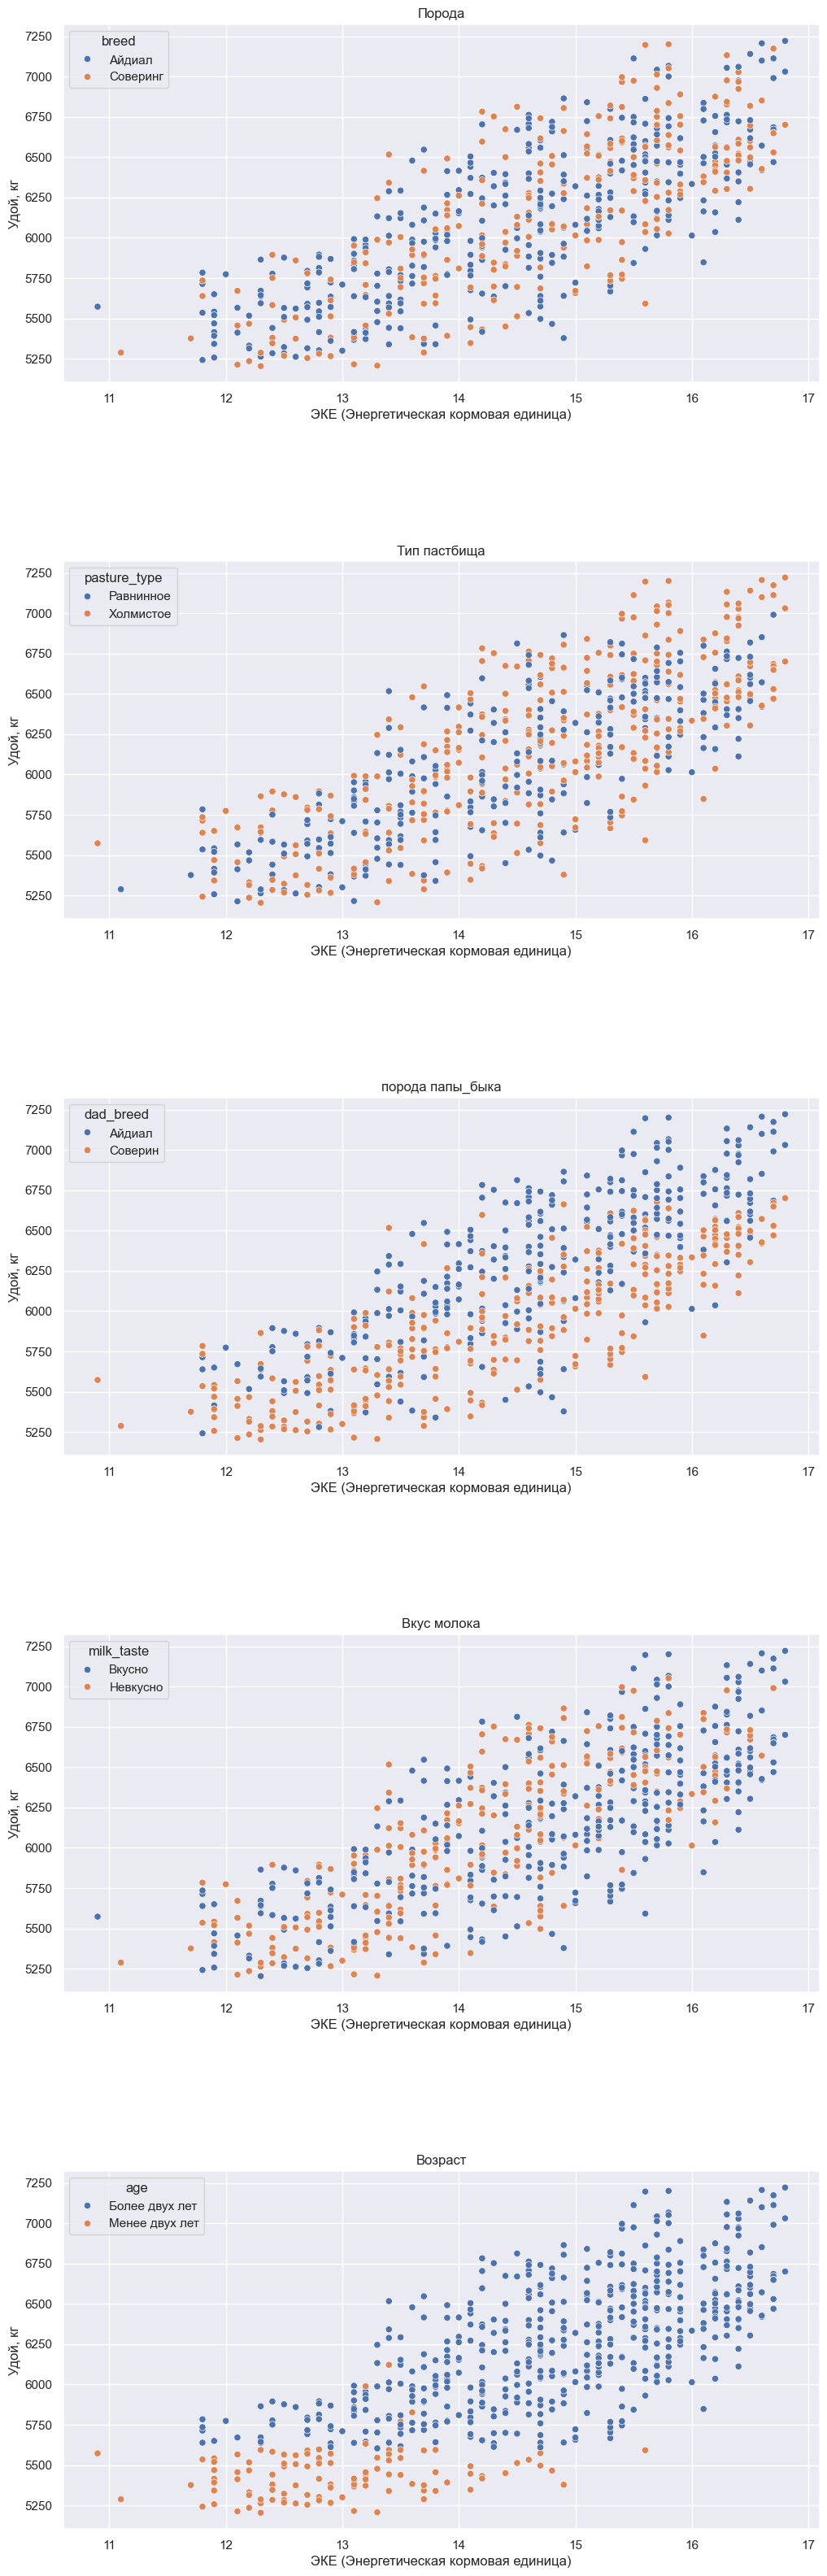

In [86]:
plt.figure(figsize=[12, 40])
create_gpaph(data_main, 'eau', cat_sign_main, main_columns_inv);

Графики показывают что корреляция сильная, однако это больше похоже на квадратическую зависимость. Почти у всех категориальных признаков разброс одинаковый, кроме породы папы (у Айдиала чуть больше), типа пастбища (больше у холмистого) и возраста.

#### Сырой протеин

Создадим графики для переменной сырой протеин.

Коэффициент корреляции:  0.4467312546088666


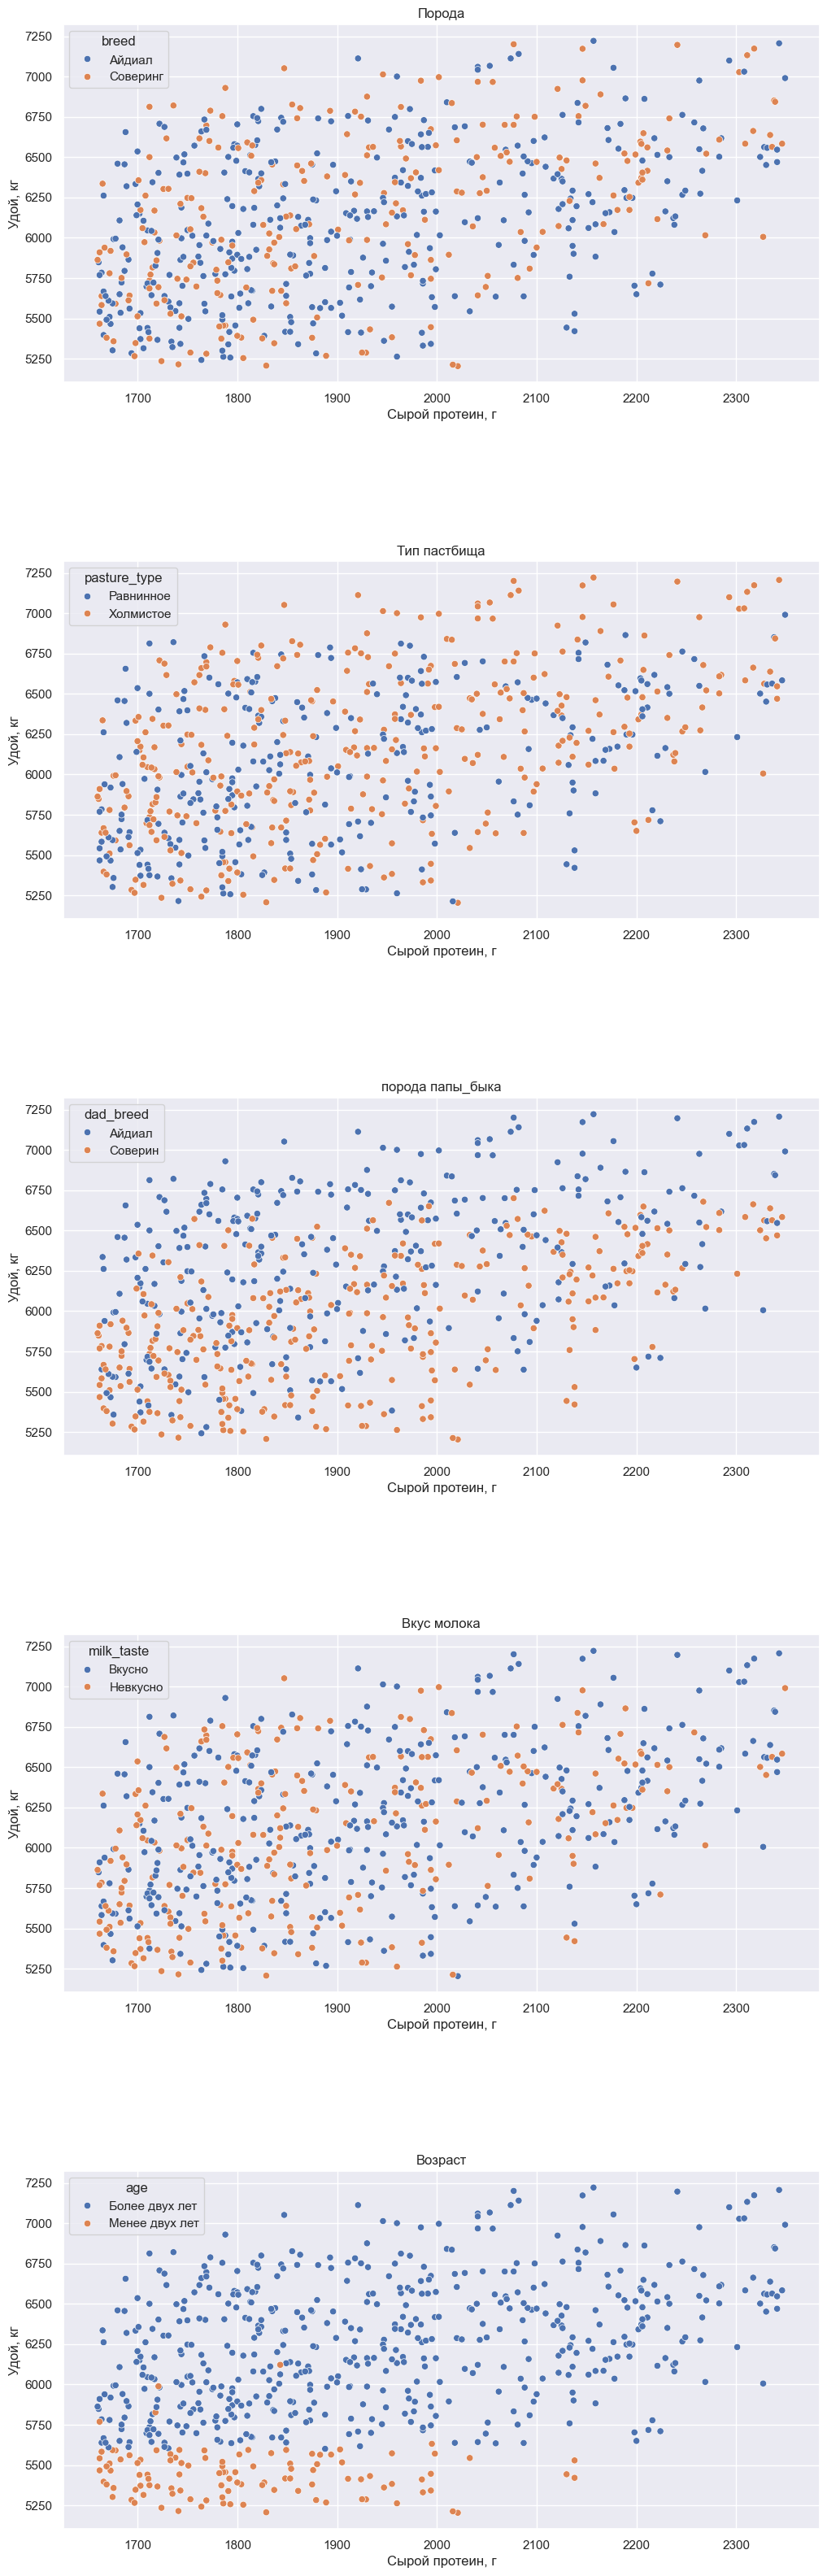

In [87]:
plt.figure(figsize=[12, 40])
create_gpaph(data_main, 'raw_protein', cat_sign_main, main_columns_inv);

На всех графиках видно, что корреляции между сырым протеином и удоем корреляция слабая, независимо от качественного признака. Различия качественного признака наблюдается у породы папы, типом пастбища и возрастом.

#### СПО

Создадим графики для переменной СПО.

Коэффициент корреляции:  0.8063389252912262


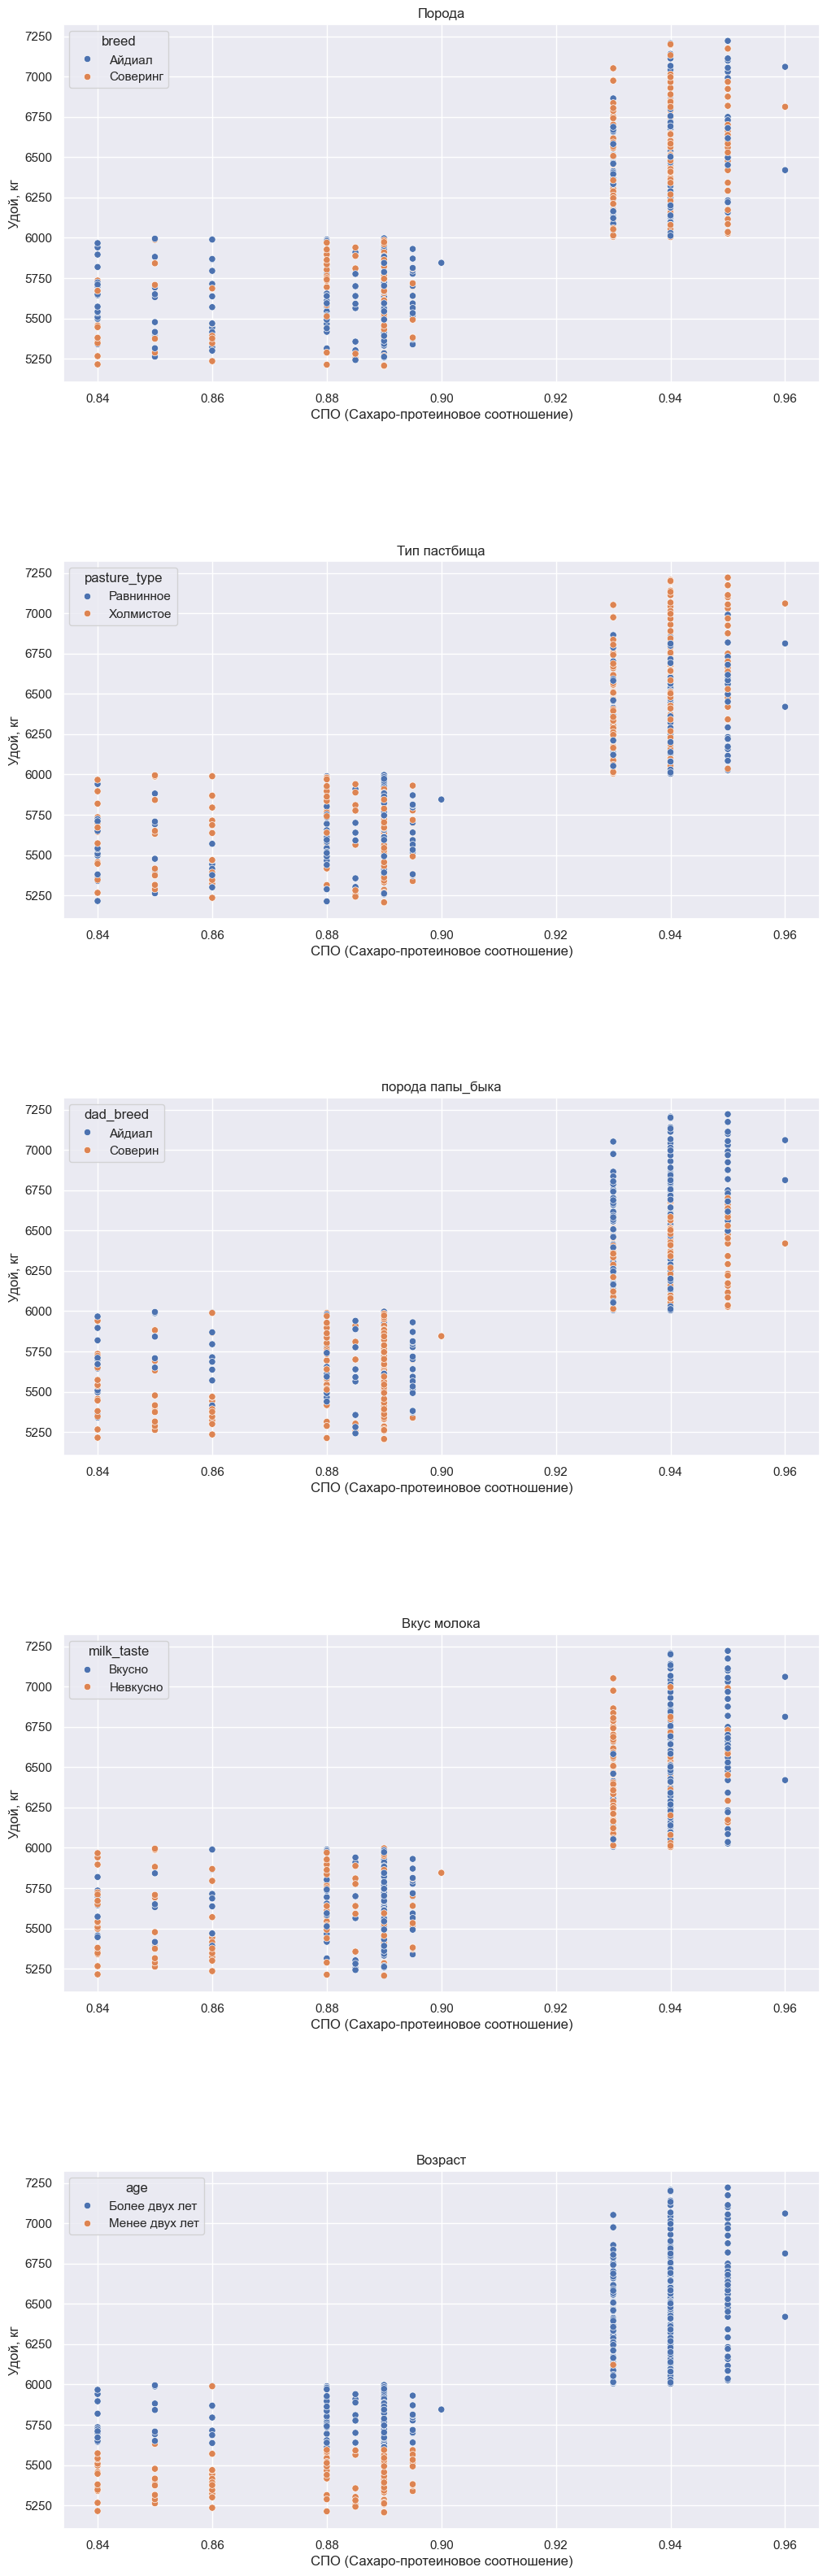

In [88]:
plt.figure(figsize=[12, 40])
create_gpaph(data_main, 'spa', cat_sign_main, main_columns_inv);

Графики показывают, что есть чёткое разделение для удоя на значении СПО примерно на 0.91. Значение было переведено в категориальное по трём группам, сейчас я сделаю то же самое, только на два признака.

In [89]:
data_main['spa_cat_two'] = data_main['spa'].apply(lambda x: 'Меньше 0.91' if x<0.91 else 'Больше 0.91')
data_main['spa_cat_two'].unique()

array(['Меньше 0.91', 'Больше 0.91'], dtype=object)

#### Жирность

Создадим графики для переменной Жирность.

Коэффициент корреляции:  0.6009018484316156


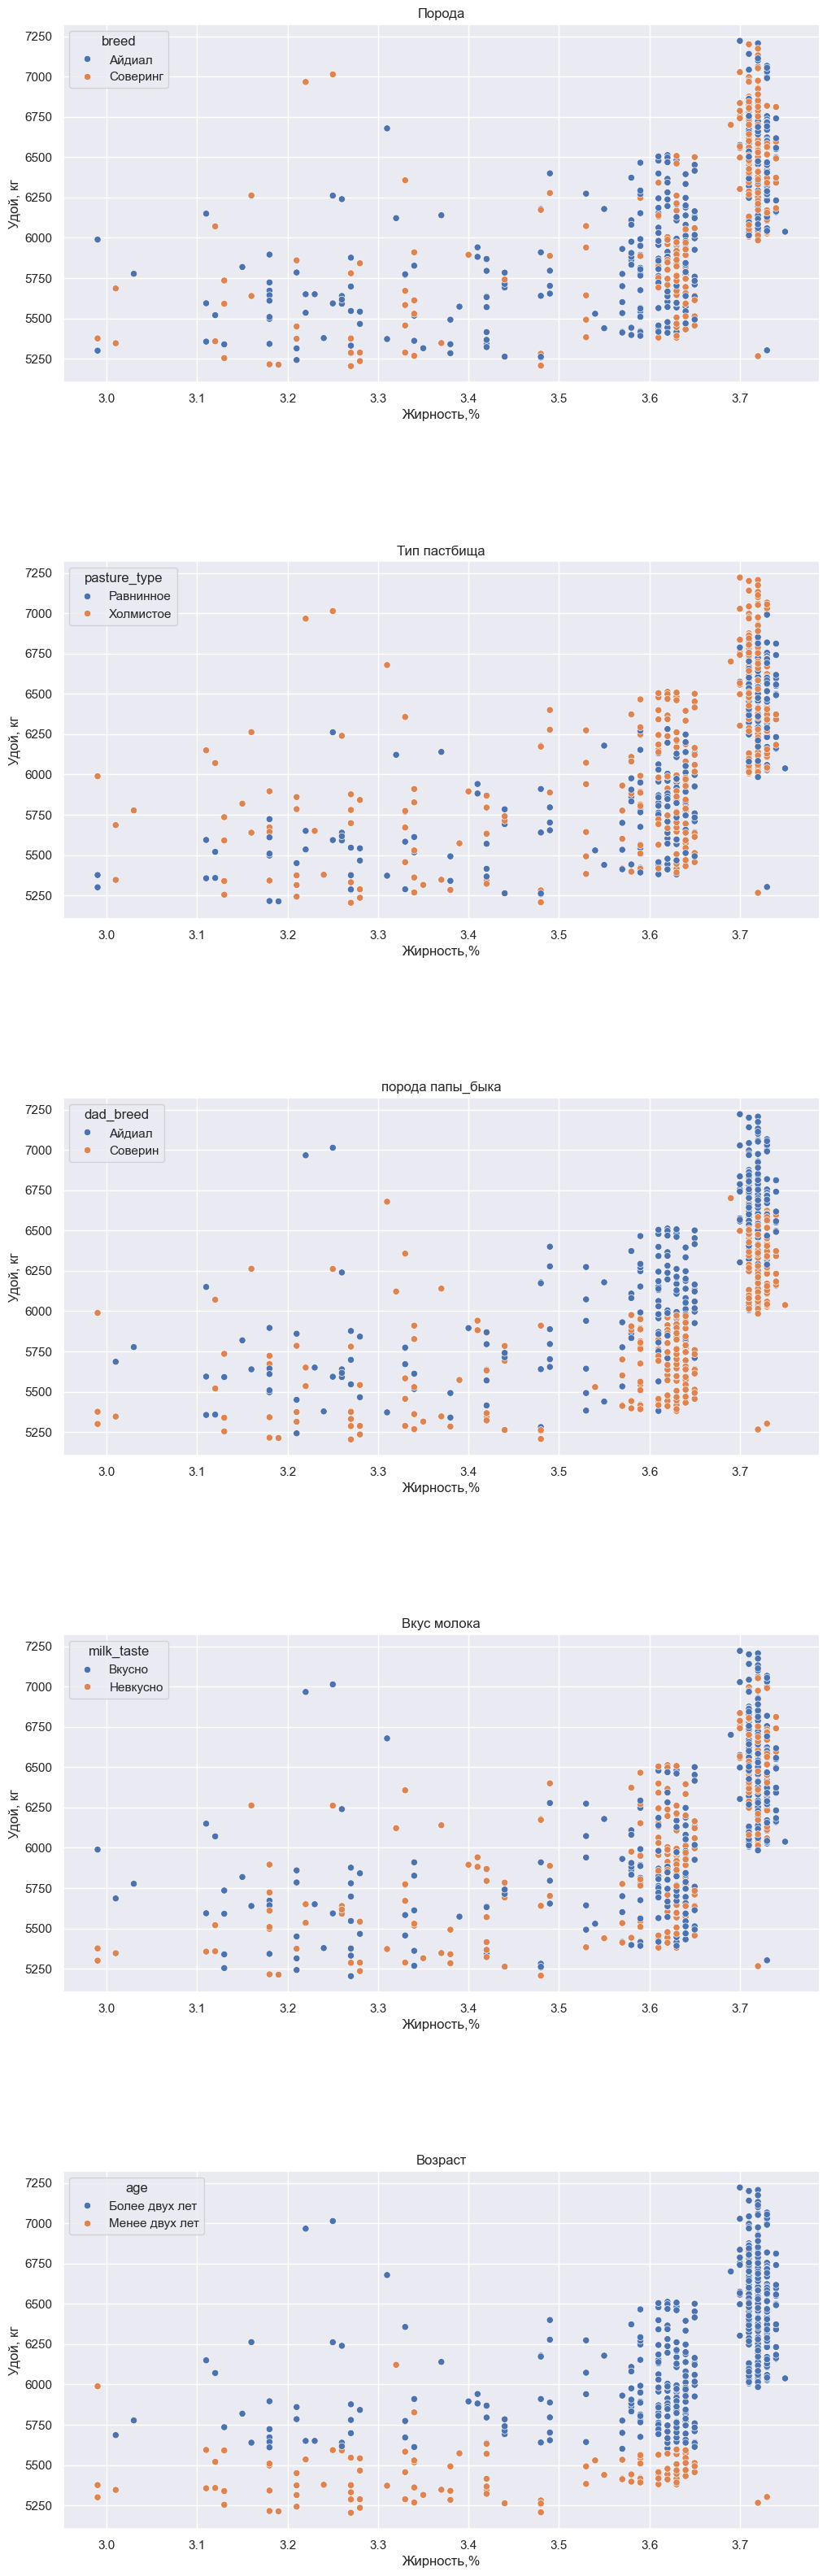

In [90]:
plt.figure(figsize=[12, 40])
create_gpaph(data_main, 'fat_contant', cat_sign_main, main_columns_inv);

Как и в случае выше корреляции средняя, однако можно перевести жирность в категориальный признак по трём группам, что мы сделали выше добавив столбец fat_contant_cat. Среди разброса по качественным признакам порода папы, тип пастбища и возраст опять различается.

#### Белок

Создадим графики для переменной белок.

Коэффициент корреляции:  0.002965710114691232


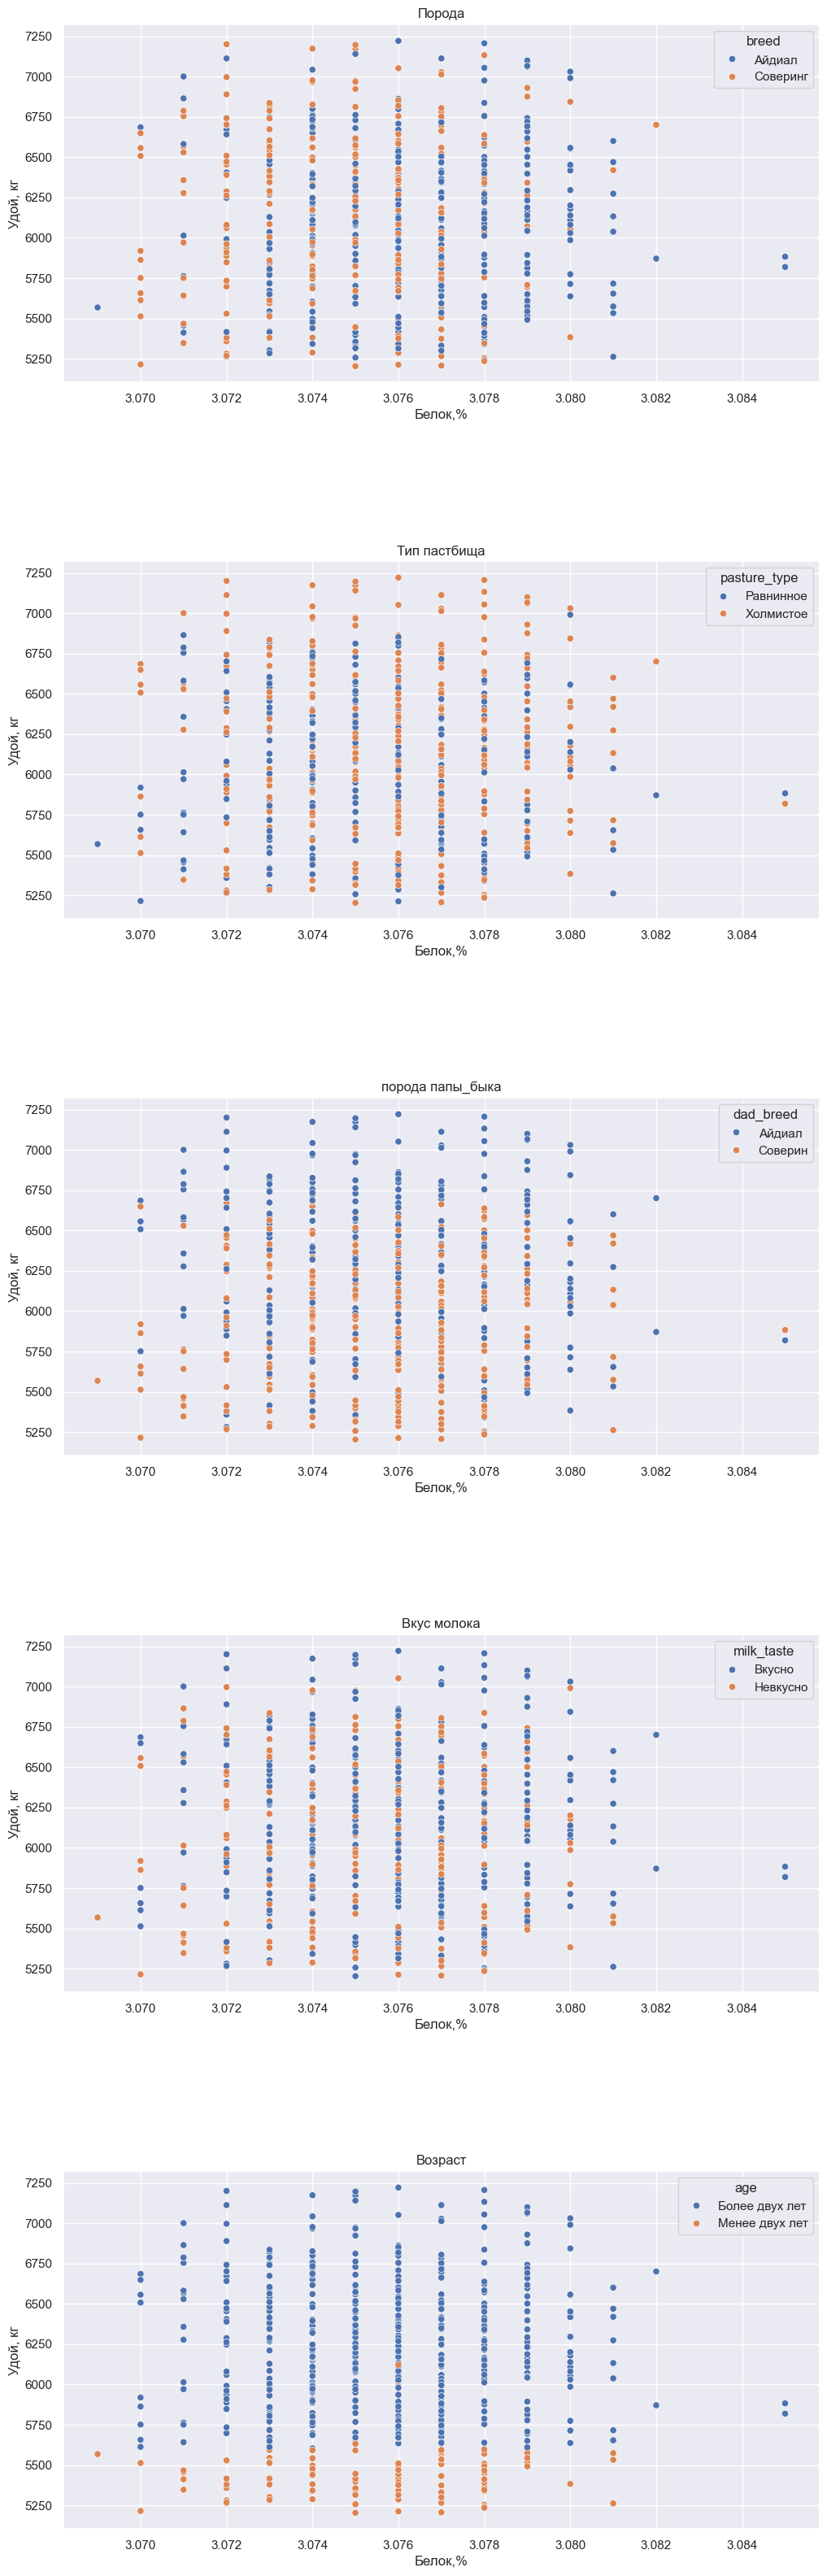

In [91]:
plt.figure(figsize=[12, 40])
create_gpaph(data_main, 'protein', cat_sign_main, main_columns_inv);

Здесь корреляции не наблюдается.

Выводы на основе полученных диаграм рассеяния:
1. Для переменной ЭКЕ наблюдается квадратическая зависимость.
2. СПО делится на две группы, для чего мы ввели новую категориальную переменную
3. Возраст влияет на удой абсолютно на всех графиках.
4. Тип пастбища и порода папы незначительно влияют на удой.
4. Среди некоторых признаков имеется высокая корреляция, для избежания мультиколлинеарности необходимо будет построить новый хитмэп относительно этих признаков

## Часть 5. Обучение модели линейной регрессии

### 1. Составление трёх моделей

Создадим некоторые функции, которые помогут проще создавать модель линейной регрессии.

Создадим функцию масштабирование количественных признаков.

In [92]:
def get_quant(X_train, X_test, quant_list): #X_train - тренировочная выборка, X_test - тестовая выборка
                                            #quant_list - список количественных переменных
    scaler = StandardScaler()

    scaler.fit(X_train[quant_list])

    X_train_scaler =  scaler.transform(X_train[quant_list])
    X_test_scaler = scaler.transform(X_test[quant_list])

    X_train_scaler = pd.DataFrame(X_train_scaler, columns=quant_list)
    X_test_scaler = pd.DataFrame(X_test_scaler, columns=quant_list)

    return X_train_scaler, X_test_scaler, scaler

Создадим функцию кодирования качественных признаков.

In [93]:
def get_cat(X_train, X_test, cat_list):
    
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

    X_train_ohe = encoder.fit_transform(X_train[cat_list]) 
    X_test_ohe = encoder.transform(X_test[cat_list]) 

    encoder_col_names = encoder.get_feature_names_out() 

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    return X_train_ohe, X_test_ohe, encoder

Для обучения модели линейной регрессии необходимо выбрать входные признаки путём анализа по таблице корреляции и различных причинно-следственных связей. Рассмотрим каждый признак по отдельности и выберем нужные:

<font color='green'>
1. ЭКЕ (Энергетическая кормовая единица). Корреляция 72%. Показывает питательность корма для животных, а чем питательнее корм, тем больше будет корова, следовательно больше будет удой. Подходит.
    </font>
    <br />
    
<font color='green'>
2. Сырой протеин. Корреляция 46%. Показывает общее количество белков в корме. Для чёткого определения влияния сырого протеина на удой необходимо его содержание в процентах на 1 кг корма, помимо этого нужен химический состав корма, однако его можно использовать. Подходит.
    </font>   
    <br />
    
<font color='red'>
3. СПО (Сахаро-протеиновое соотношение). Корреляция 66%. Отражает отношение сахара к белку. Не влияет на удой так как количество сахара не отражает количество удоя. Не подходит.
    </font>
    <br />
    
<font color='green'>
3.1 СПО (Сахаро-протеиновое соотношение), разделённое по группам. Корреляция 81%. Графики показывают, что корреляция есть, используем это во второй модели. Подходит.
    </font>
    <br />
    
<font color='green'>
4. Порода. Корреляция 16%. Разные породы дают разное количество молока. Подходит.
    </font>
    <br />
    
<font color='green'>
5. Тип пастбища. Корреляция 28%. На равнинных пастбищах больше травы, количество будет влиять на удой что мы видели на графиках.  Подходит.
    </font>
    <br />
    
<font color='green'>
6. Порода папы быка. Корреляция 52%. На графиках было видно, что удой у одной группы чуть больше. Подходит.
    </font>
    <br />
    
<font color='red'>
7. Жирность. Корреляция 71%. Уровень жира в молоке небольшой, поэтому не подходит.
    </font>
    <br />
    
<font color='green'>
7.1 Жирность, разделённая по группам. Корреляция 75%. Подходит.
    </font>
    <br />
    
<font color='red'>
8. Белок. Корреляция 6%. Уровень белка в молоке небольшой, поэтому не подходит.
    </font>
    <br />
    
<font color='red'>
9. Вкус молока. Корреляция 17%. Не подходит понятно почему.
    </font>
    <br />
    
<font color='green'>
10. Возраст. Корреляция 100%. С возрастом корова даёт больше молока. Подходит.
    </font>
    <br />

#### Модель 1

Выпишем отдельно нужные признаки, разделив их на качественные и количественные.

In [94]:
quant_col_names_1 = ['eau', 'raw_protein'] #['eau', 'fat_contant'] 
cat_col_names_1 = ['pasture_type', 'dad_breed', 'age'] #['breed', 'pasture_type', 'milk_taste']
all_col_names_1 = quant_col_names_1 + cat_col_names_1

Построим хитмэп по отобранным признакам.

C:\Users\igsto\anaconda3\Lib\site-packages\phik\phik.py:150: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


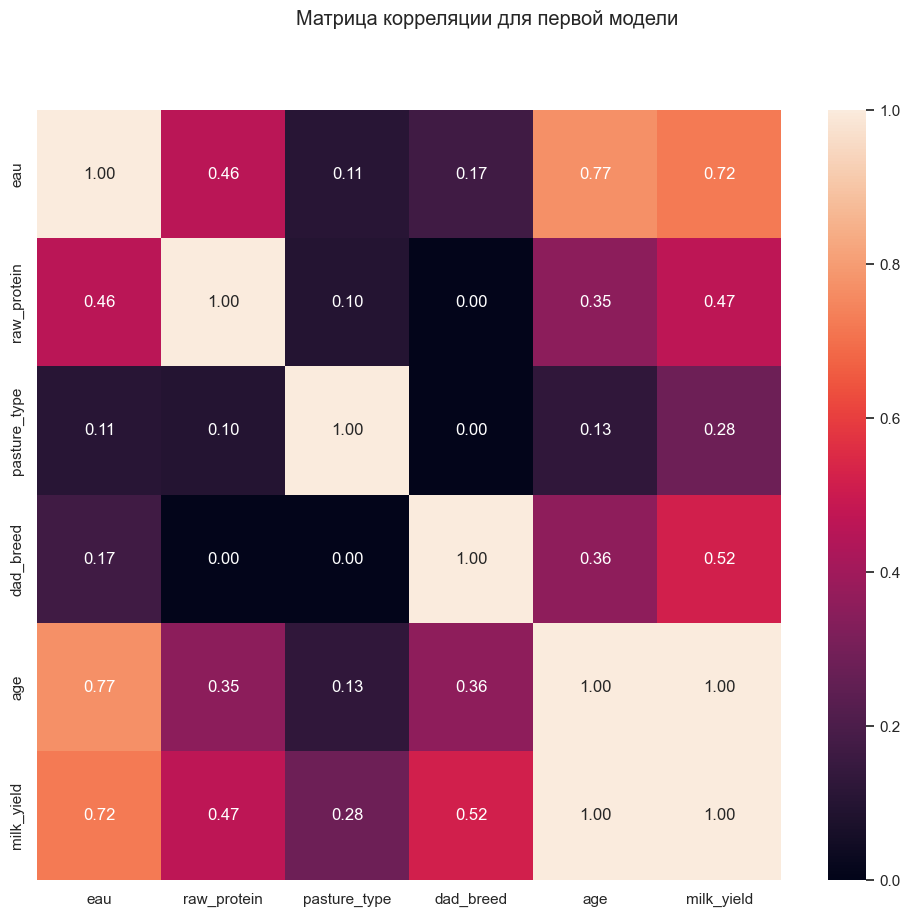

In [95]:
cm_model_1 = data_main.loc[:, all_col_names_1+ ['milk_yield']].phik_matrix(interval_cols=quant_col_names_1+['milk_yield'])

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции для первой модели')
sns.heatmap(cm_model_1, annot=True, fmt='.2f');

Между некоторыми признаками имеется высокая корреляция.

Для обучения модели линейной регрессии необходимо выбрать входные признаки. Исходя из матрицы корреляции и графиков, среди количественных признаков можно выбрать ЭКЕ и жирность. Из категориальных признаков выберем породу (так как у разных пород молоко отличается), тип пастбища (так как от качетсва питания зависит вкус) и вкус молока.

Выпишим список столбцов, которые нужны для модели.

Введём новую таблицу с отобранными признаками.

In [96]:
data_main_yield_1 = data_main[all_col_names_1 + ['milk_yield']]
data_main_yield_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 628
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eau           628 non-null    float64
 1   raw_protein   628 non-null    int64  
 2   pasture_type  628 non-null    object 
 3   dad_breed     628 non-null    object 
 4   age           628 non-null    object 
 5   milk_yield    628 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 34.3+ KB


Проверим размерности изначального датасета и нового на количество строк.

In [97]:
data_main_yield_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 628
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eau           628 non-null    float64
 1   raw_protein   628 non-null    int64  
 2   pasture_type  628 non-null    object 
 3   dad_breed     628 non-null    object 
 4   age           628 non-null    object 
 5   milk_yield    628 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 34.3+ KB


Количество строк совпадает.

Разобьём таблицу на тренировочную и тестовую выборки.

In [98]:
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(
    data_main_yield_1.drop('milk_yield', axis=1),
    data_main_yield_1['milk_yield'],
    random_state=RANDOM_STATE
)

Проверим размерности тренировочных и тестовых выборок.

In [99]:
X_train_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 508 to 103
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eau           471 non-null    float64
 1   raw_protein   471 non-null    int64  
 2   pasture_type  471 non-null    object 
 3   dad_breed     471 non-null    object 
 4   age           471 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.1+ KB


In [100]:
y_train_yield.head()

508    6498
383    5268
587    5610
197    6343
328    5833
Name: milk_yield, dtype: int64

Кодируем категориальные признаки с помощью OneHotEncoder

In [101]:
X_train_ohe_yield_1, X_test_ohe_yield_1, encoder_yield_1 = get_cat(X_train_yield, X_test_yield, cat_col_names_1)

In [102]:
X_train_ohe_yield_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pasture_type_Холмистое  471 non-null    float64
 1   dad_breed_Соверин       471 non-null    float64
 2   age_Менее двух лет      471 non-null    float64
dtypes: float64(3)
memory usage: 11.2 KB


Масштабируем количественные признаки.

In [103]:
X_train_quant_yield_1, X_test_quant_yield_1, scaler_yield_1 = get_quant(X_train_yield, X_test_yield, quant_col_names_1)

In [104]:
X_train_quant_yield_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   eau          471 non-null    float64
 1   raw_protein  471 non-null    float64
dtypes: float64(2)
memory usage: 7.5 KB


In [105]:
X_test_quant_yield_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   eau          157 non-null    float64
 1   raw_protein  157 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


Объединим две таблицы.

In [106]:
X_train_all_yield_1 = pd.concat([X_train_quant_yield_1, X_train_ohe_yield_1], axis=1)
X_test_all_yield_1 = pd.concat([X_test_quant_yield_1, X_test_ohe_yield_1], axis=1)

Создадим модель и обучим.

In [107]:
model_lr_yield_1  = LinearRegression()

model_lr_yield_1.fit(X_train_all_yield_1, y_train_yield);

Сделаем предсказание.

In [108]:
predict_yield_1 = model_lr_yield_1.predict(X_test_all_yield_1)
len(predict_yield_1)

157

Оценим качество модели $R^2$

In [109]:
r2_yield_1 = r2_score(y_test_yield, predict_yield_1)  
r2_yield_1

0.7051689019103563

Качество показывает, что модель работает не так хорошо как хотелось бы.

Создадим объект series для разницы предсказания и полученного значения

In [110]:
predict_data_1 = pd.Series(y_test_yield - predict_yield_1)

Проанализируем остатки.

Прежде чем строить гистограмму построим ящик с усами, он более точно определит середину.

Text(0, 0.5, 'Удой')

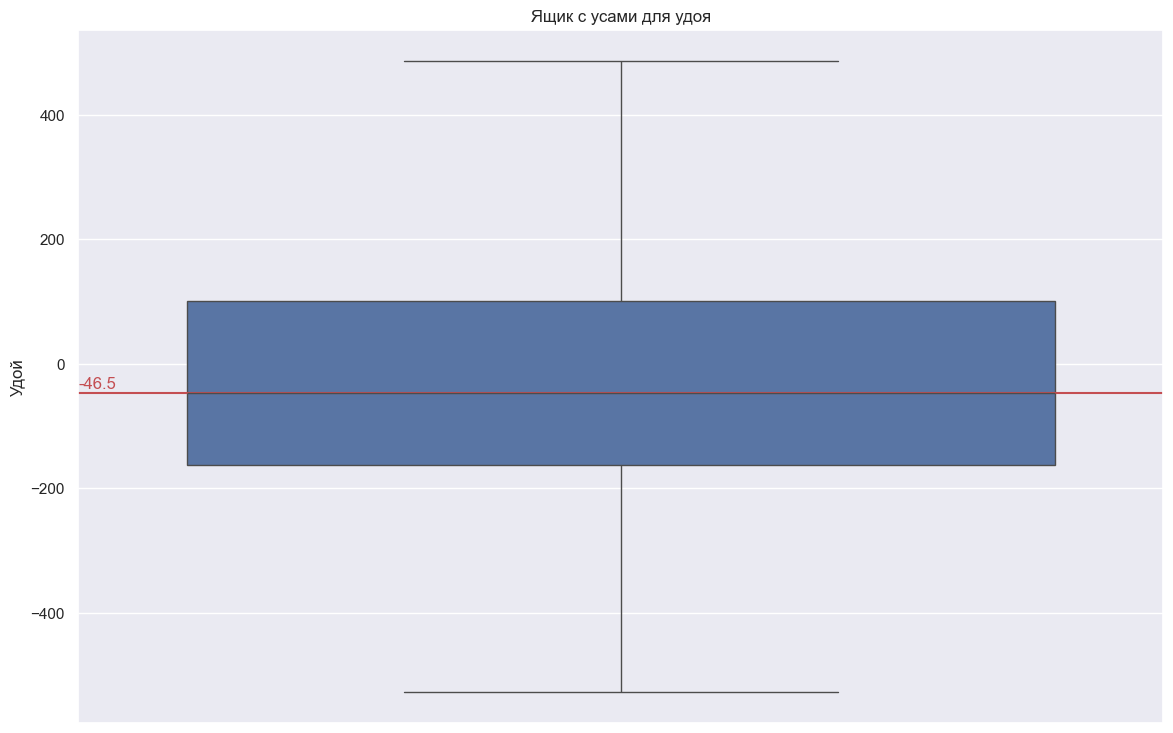

In [111]:
(sns.boxplot(data=predict_data_1, showfliers = False)
 .set_title('Ящик с усами для удоя'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.text(-0.5, -40, '-46.5', color='r')
plt.axhline(y=-46.5, color='r')
plt.ylabel('Удой')
#plt.xlabel('Коровы');

Найдём 5 и 95 процентили.

In [112]:
print('5 процентиль первой модели =', np.quantile((predict_data_1), 0.05))
print('95 процентиль первой модели =', np.quantile((predict_data_1), 0.95))

5 процентиль первой модели = -421.72718660134433
95 процентиль первой модели = 406.24091654025733


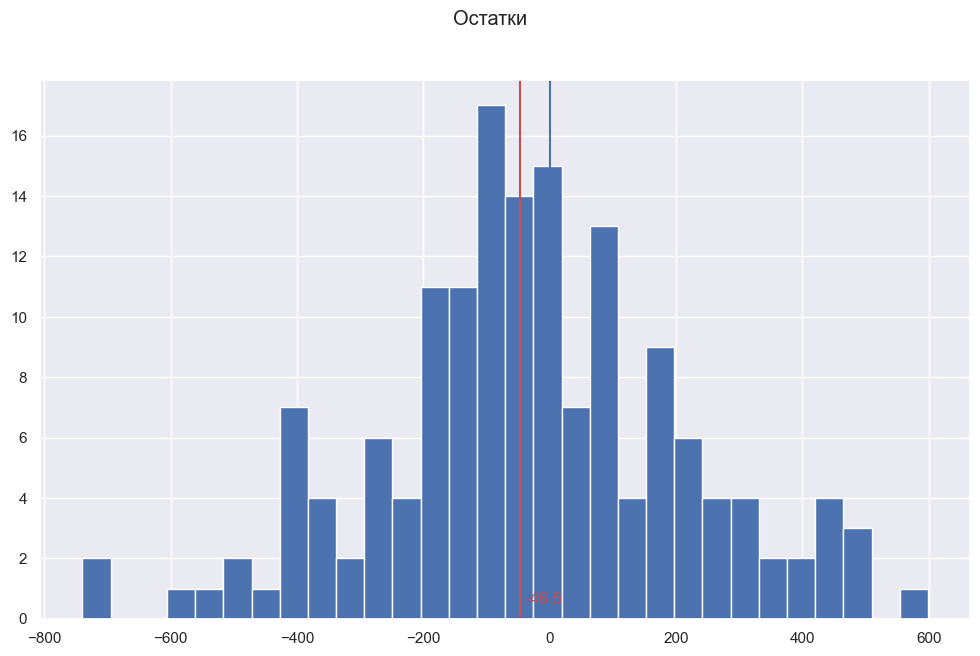

In [113]:
ax = (predict_data_1).hist(
    bins=30, 
    figsize=(12,7),
    grid=True
)
#print(ax[1])
plt.axvline(x=0, color='b')
plt.axvline(x=-46.5, color='r')
#plt.axvline(x=-105, color='r')
plt.text(-40, 0.5, '-46.5', color='r')
plt.suptitle('Остатки');

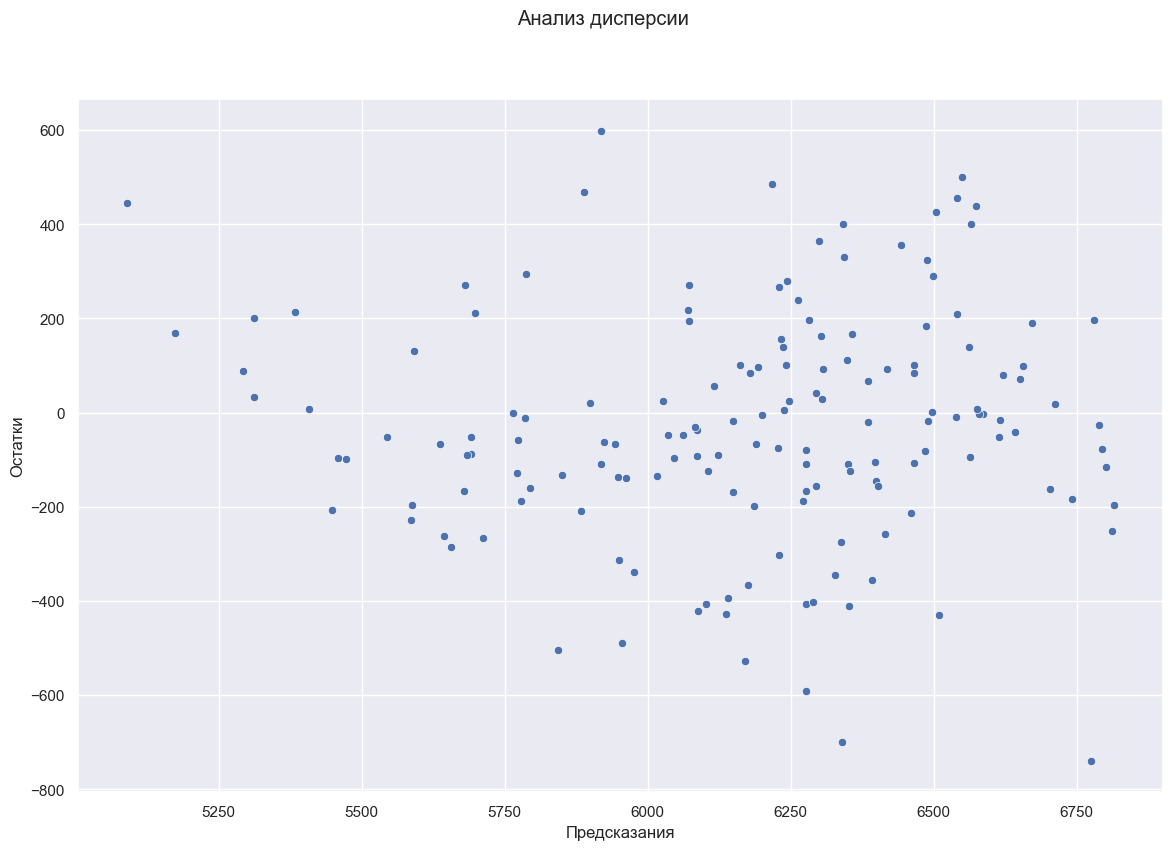

In [114]:
ax = sns.scatterplot(x=predict_yield_1, y=y_test_yield - predict_yield_1)
ax.set_xlabel('Предсказания')
ax.set_ylabel('Остатки')
plt.suptitle('Анализ дисперсии');

Ящик с усами показывает, что середина около -46. Гистограмма показывает, что имеются выбросы плюс распределение отличается от нормального. Анализ дисперсии говорит что остатки распределены равномерно.

#### Модель 2

Устраним нелинейность в некоторых признаках.

Возведём признак ЭКЕ в квадрат.

In [115]:
data_main['eau2'] = data_main['eau'] ** 2

Возьмём признак СПО. На графике видно, что значения разбиваются на два кластера. Мы уже преобразовали признак СПО по трём кластерам.

Построим хитмэп корреляций между целевыми признаками, для чего введём их аналогично заданию выше, однако теперь учтём ранее введённые признаки, а именно категориальную жирность и категориальную СПО.

In [116]:
quant_col_names_2 = ['eau2', 'raw_protein'] 
cat_col_names_2 = ['breed', 'pasture_type', 'dad_breed', 'age', 'fat_contant_cat', 'spa_cat_two']
all_col_names_2 = quant_col_names_2 + cat_col_names_2

C:\Users\igsto\anaconda3\Lib\site-packages\phik\phik.py:150: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


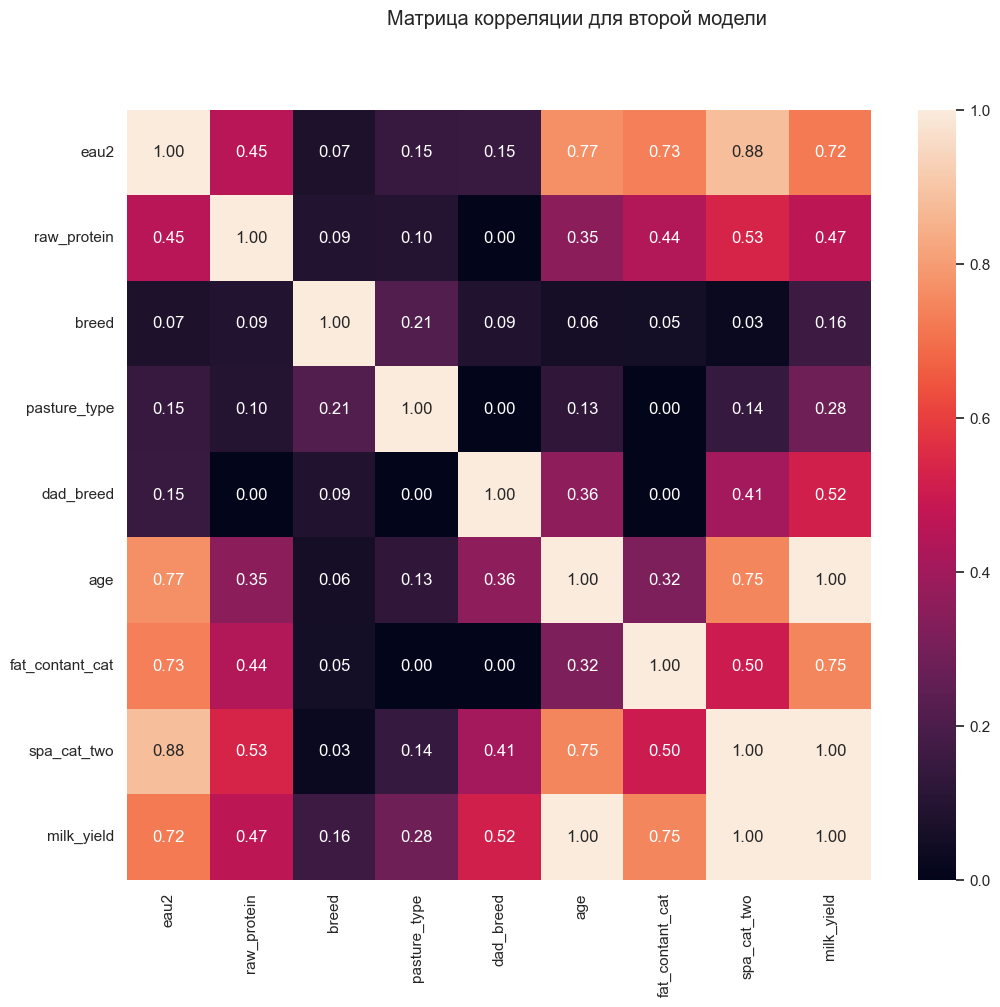

In [117]:
cm_model_2 = data_main.loc[:, all_col_names_2 + ['milk_yield']].phik_matrix(interval_cols=quant_col_names_2+['milk_yield'])

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции для второй модели')
sns.heatmap(cm_model_2, annot=True, fmt='.2f');

Тут у некоторых признаков высокая корреляция, некоторые даже имеют корреляцию 1 относительно целевого признака.

Повторим операции аналогично заданию выше.

In [118]:
#создадим новый датафрейм
data_main_yield_2 = data_main[all_col_names_2 + ['milk_yield']]

#разобьём признаки на выборки
X_train_yield_2, X_test_yield_2, y_train_yield_2, y_test_yield_2 = train_test_split(
    data_main_yield_2.drop('milk_yield', axis=1),
    data_main_yield_2['milk_yield'],
    random_state=RANDOM_STATE
)

#закодируем категориальные признаки
X_train_ohe_yield_2, X_test_ohe_yield_2, encoder_yield_2 = get_cat(X_train_yield_2, X_test_yield_2, cat_col_names_2)

#масштабируем количественные признаки
X_train_quant_yield_2, X_test_quant_yield_2, scaler_yield_2 = get_quant(X_train_yield_2, X_test_yield_2, quant_col_names_2)

#Объединим датафреймы
X_train_all_yield_2 = pd.concat([X_train_quant_yield_2, X_train_ohe_yield_2], axis=1)
X_test_all_yield_2 = pd.concat([X_test_quant_yield_2, X_test_ohe_yield_2], axis=1)

#инициализируем и обучим модель
model_lr_yield_2  = LinearRegression()
model_lr_yield_2.fit(X_train_all_yield_2, y_train_yield_2);

#сделаем предсказание
predict_yield_2 = model_lr_yield_2.predict(X_test_all_yield_2)

Найдём $R^2$

In [119]:
r2_yield_2 = r2_score(y_test_yield_2, predict_yield_2)  
r2_yield_2

0.8118610885953732

Проанализируем остатки.

Построим ящик с усами чтобы корректно определить середину.

In [120]:
predict_data_2 = pd.Series(y_test_yield_2 - predict_yield_2)

Text(-0.5, -21, '-25')

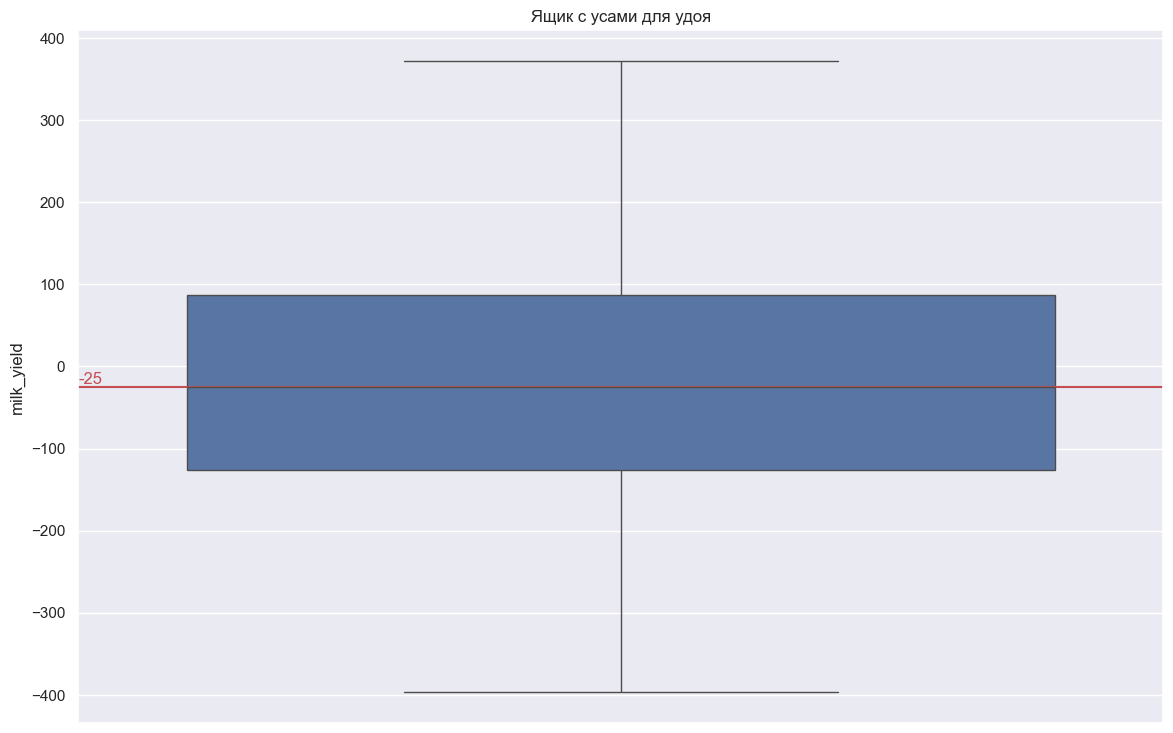

In [121]:
(sns.boxplot(data=predict_data_2, showfliers = False)
 .set_title('Ящик с усами для удоя'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.axhline(y=-25, color='r')
plt.text(-0.5, -21, '-25', color='r')

Найдём 5 и 95 процентили.

In [122]:
print('5 процентиль второй модели =', np.quantile((predict_data_2), 0.05))
print('95 процентиль второй модели =', np.quantile((predict_data_2), 0.95))

5 процентиль второй модели = -307.17203760033755
95 процентиль второй модели = 310.7588601583125


Построим гистограмму.

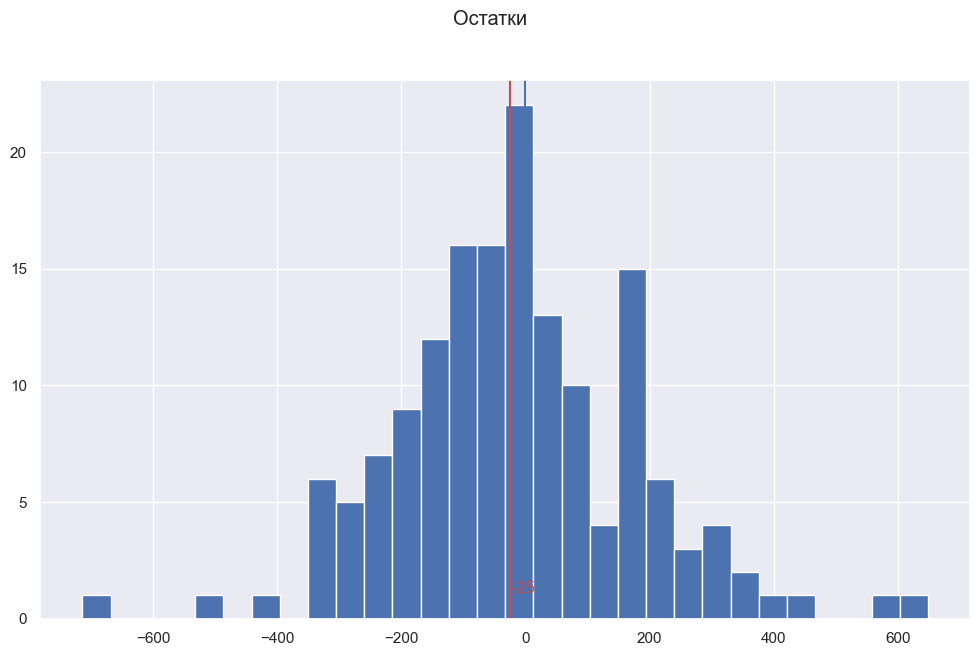

In [123]:
ax = (predict_data_2).hist(
    bins=30, 
    figsize=(12,7),
    grid=True
)
plt.axvline(x=0, color='b')
plt.axvline(x=-25, color='r')
plt.text(-23, 1.1, '-25', color='r')
plt.suptitle('Остатки');

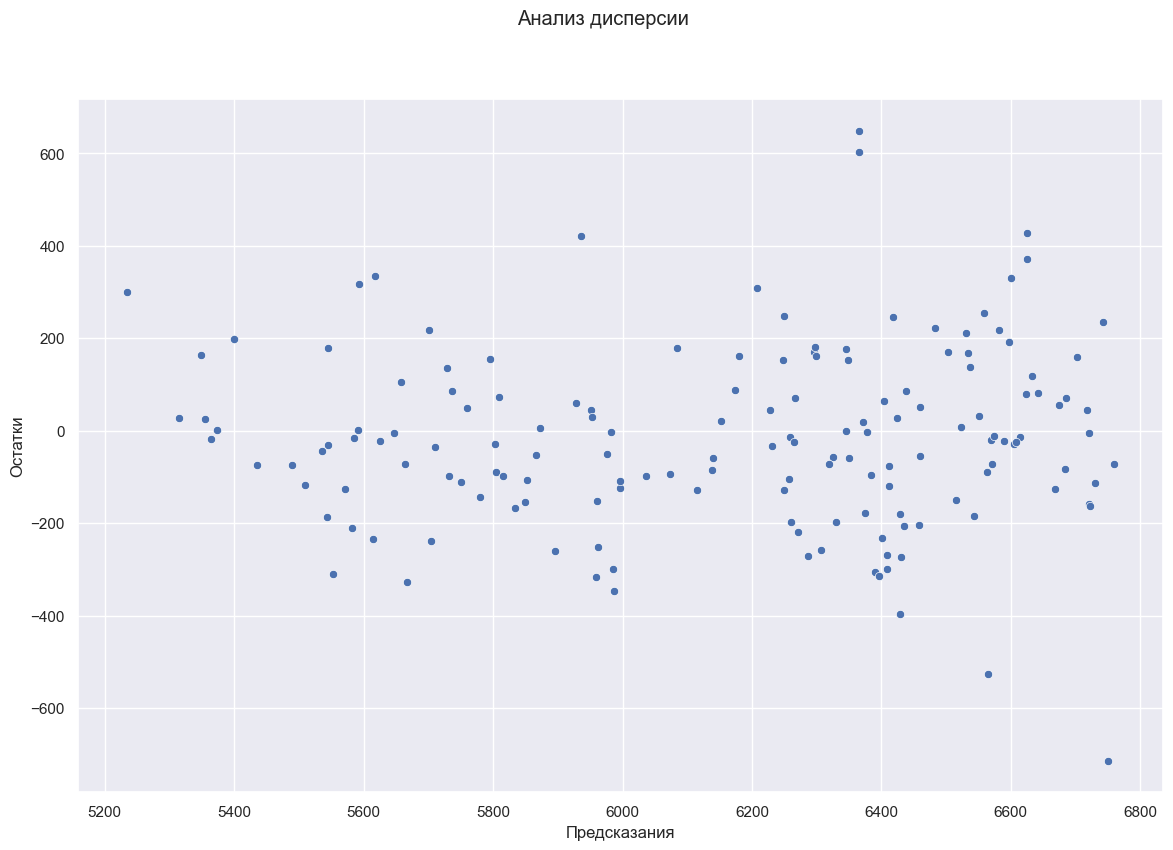

In [124]:
ax = sns.scatterplot(x=predict_yield_2, y=predict_data_2)
ax.set_xlabel('Предсказания')
ax.set_ylabel('Остатки')
plt.suptitle('Анализ дисперсии');

Пик около -26, для удоя порядка $10^{3}$ это около 0. Выбросов меньше, чем у первой модели, но всё равно присутствуют, гистограмма показывает, что в целом распределение похоже на нормальное. Анализ дисперсии показывает, что остатки в целом распределены равномерно.

#### Модель 3

Добавим признак имя папы.

In [125]:
data_main_dad = data_main.merge(data_dad)
data_main_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               628 non-null    int64  
 1   milk_yield       628 non-null    int64  
 2   eau              628 non-null    float64
 3   raw_protein      628 non-null    int64  
 4   spa              628 non-null    float64
 5   breed            628 non-null    object 
 6   pasture_type     628 non-null    object 
 7   dad_breed        628 non-null    object 
 8   fat_contant      628 non-null    float64
 9   protein          628 non-null    float64
 10  milk_taste       628 non-null    object 
 11  age              628 non-null    object 
 12  spa_cat_three    628 non-null    object 
 13  fat_contant_cat  628 non-null    object 
 14  spa_cat_two      628 non-null    object 
 15  eau2             628 non-null    float64
 16  dad_name         628 non-null    object 
dtypes: float64(5), i

In [126]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 628
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               628 non-null    int64  
 1   milk_yield       628 non-null    int64  
 2   eau              628 non-null    float64
 3   raw_protein      628 non-null    int64  
 4   spa              628 non-null    float64
 5   breed            628 non-null    object 
 6   pasture_type     628 non-null    object 
 7   dad_breed        628 non-null    object 
 8   fat_contant      628 non-null    float64
 9   protein          628 non-null    float64
 10  milk_taste       628 non-null    object 
 11  age              628 non-null    object 
 12  spa_cat_three    628 non-null    object 
 13  fat_contant_cat  628 non-null    object 
 14  spa_cat_two      628 non-null    object 
 15  eau2             628 non-null    float64
dtypes: float64(5), int64(3), object(8)
memory usage: 83.4+ KB


Количество строк старого дф и нового говорит о том, что слияние прошло успешно.

Построим матрицу корреляции.

Построим диаграмму рассеяния, только теперь с новым признаком dad_name.

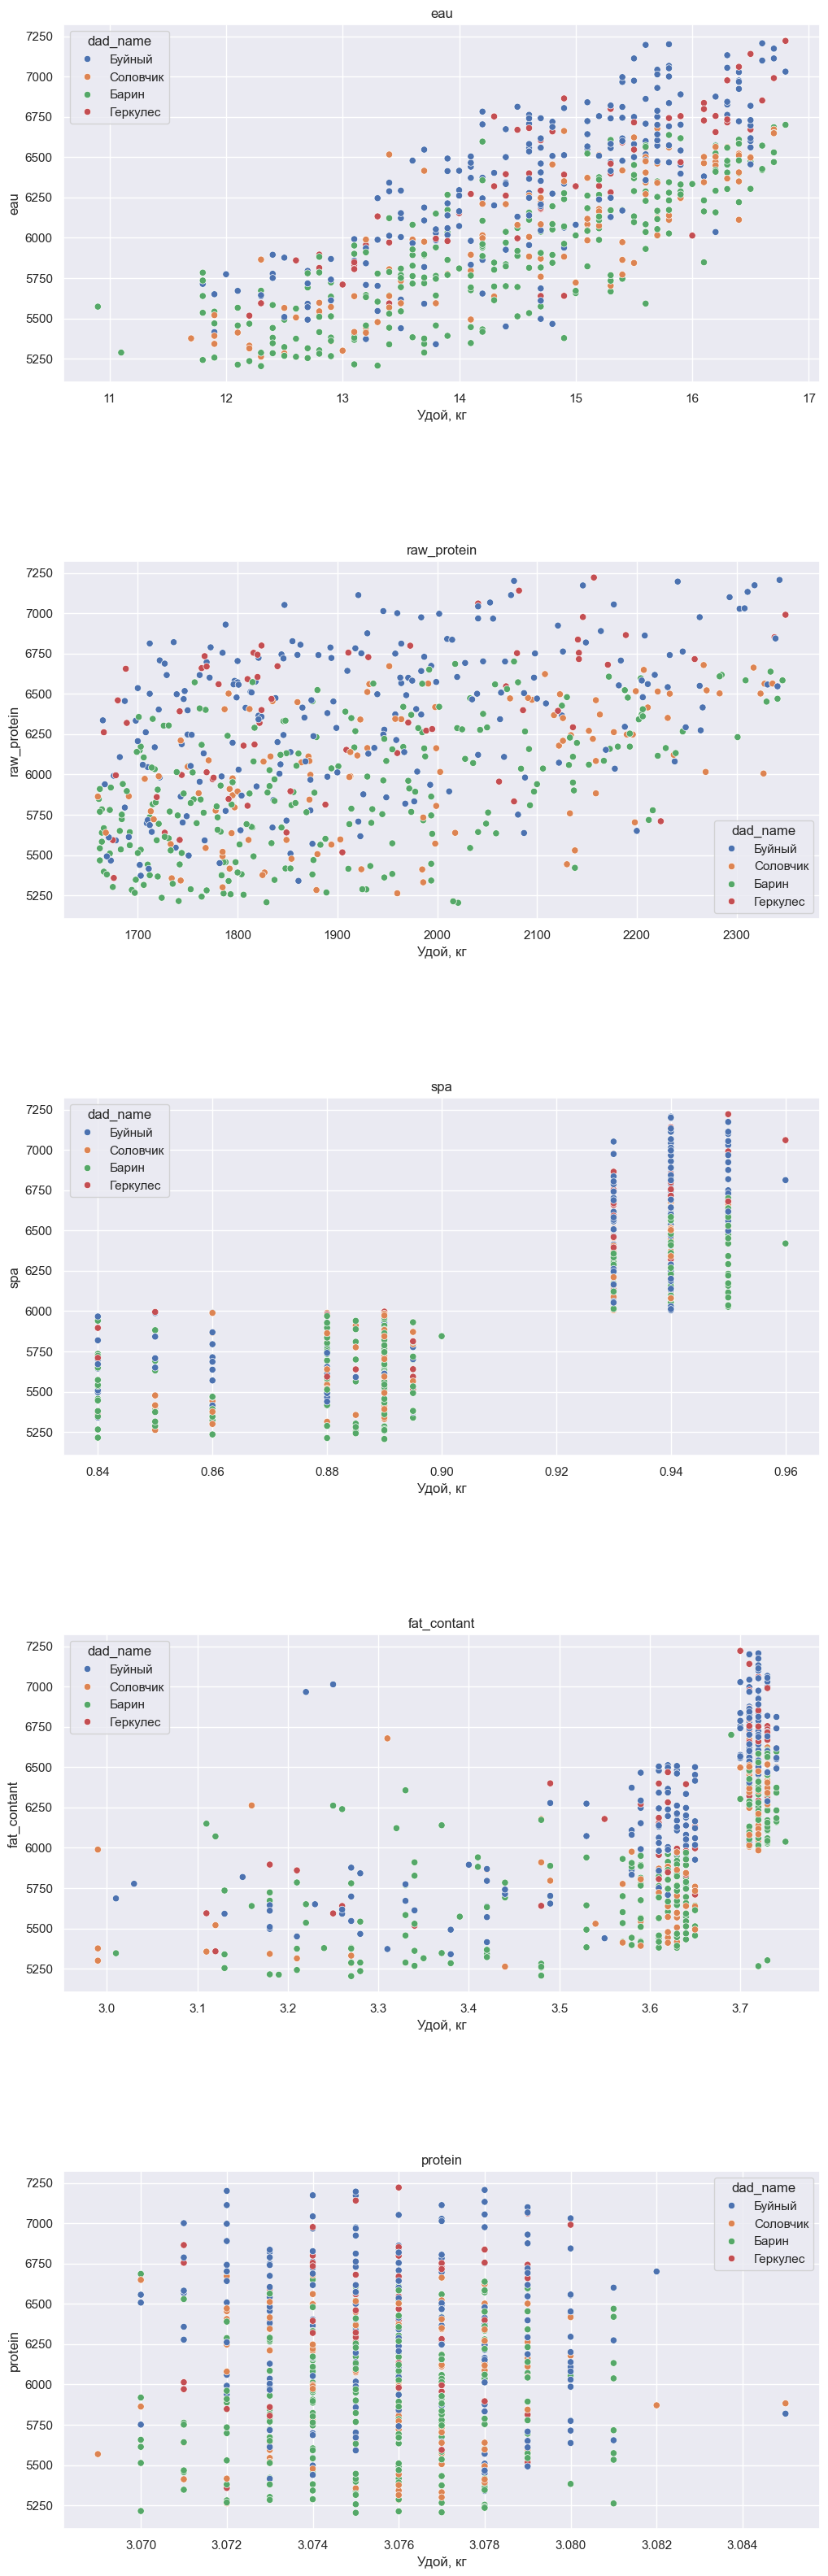

In [127]:
quant_sign = ['eau', 'raw_protein', 'spa', 'fat_contant', 'protein']

plt.figure(figsize=[12, 40])
for i, sign in enumerate(quant_sign):
    ax = plt.subplot(len(quant_sign), 1, i+1)
    sns.scatterplot(data=data_main_dad, y='milk_yield', x=sign, hue='dad_name')
    plt.title(sign)
    ax.set_xlabel('Удой, кг')
    ax.set_ylabel(sign)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

Выпишем нужные признаки.

In [128]:
quant_col_names_3 = ['eau2', 'raw_protein'] 
cat_col_names_3 = ['pasture_type', 'breed', 'dad_breed', 'age', 'fat_contant_cat', 'spa_cat_two', 'dad_name']
all_col_names_3 = quant_col_names_3 + cat_col_names_3

C:\Users\igsto\anaconda3\Lib\site-packages\phik\phik.py:150: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


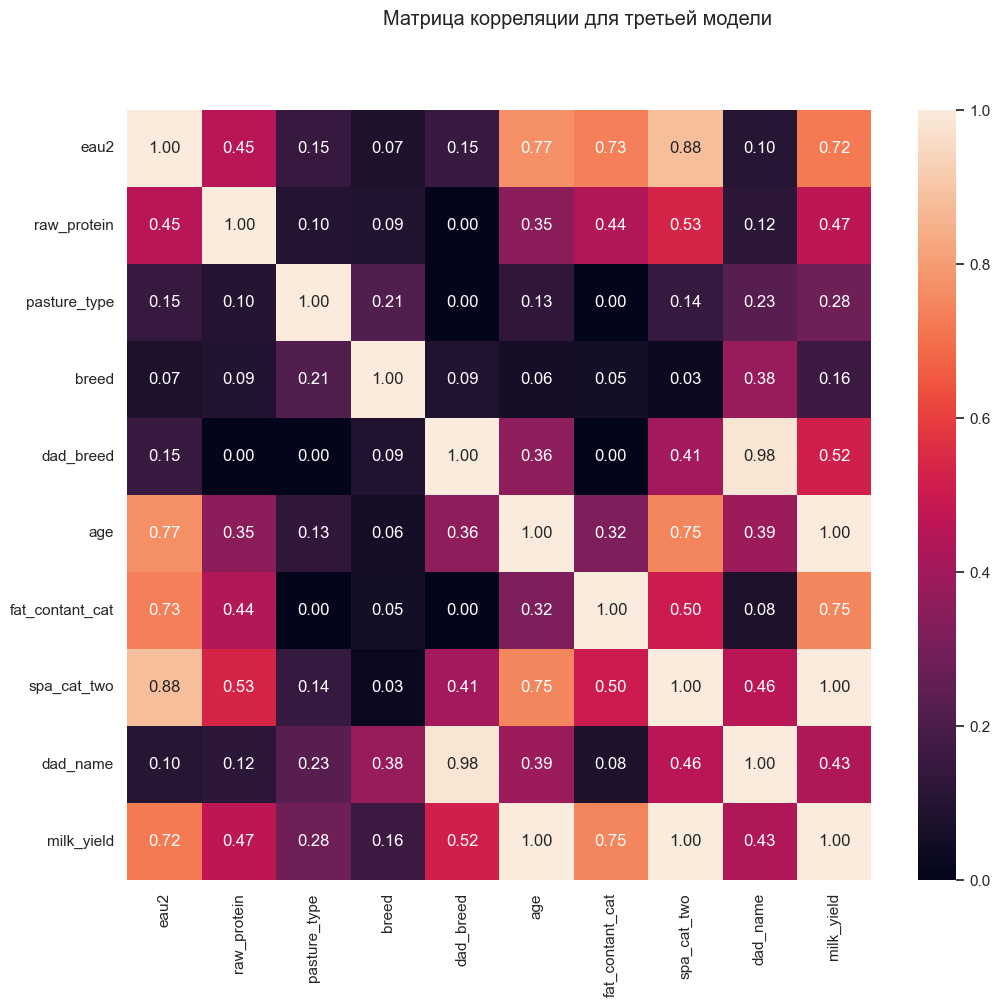

In [129]:
cm_model_3 = data_main_dad.loc[:, all_col_names_3 + ['milk_yield']].phik_matrix(interval_cols=quant_col_names_3+['milk_yield'])

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции для третьей модели')
sns.heatmap(cm_model_3, annot=True, fmt='.2f');

Матрица корреляции показывает, что корреляция между объединённым именем папы и породой папы корреляция 98%, при этом коэффициент корреляции между удоем и объединённым именем папы выше, чем у породы папы, следовательно необходимо избавиться либо от породы папы, либо от объединённым именем папы. Вторая модель учитывает породу, поэтому создадим третью, где просто заменим породу на объединённое имя.

Коэффициент корреляции у породы и имени папы около 0.98, во избежании мультиколлинеарности породу папы в третью модель мы вносить не будем.

Создадим и обучим третью модель.

In [130]:
cat_col_names_3.remove('dad_breed')

#создадим новый датафрейм
data_main_yield_3 = data_main_dad[all_col_names_3 + ['milk_yield']]

#разобьём признаки на выборки
X_train_yield_3, X_test_yield_3, y_train_yield_3, y_test_yield_3 = train_test_split(
    data_main_yield_3.drop('milk_yield', axis=1),
    data_main_yield_3['milk_yield'],
    random_state=RANDOM_STATE
)

#закодируем категориальные признаки
X_train_ohe_yield_3, X_test_ohe_yield_3, encoder_yield_3 = get_cat(X_train_yield_3, X_test_yield_3, cat_col_names_3)

#масштабируем количественные признаки
X_train_quant_yield_3, X_test_quant_yield_3, scaler_yield_3 = get_quant(X_train_yield_3, X_test_yield_3, quant_col_names_3)

#объединим датафреймы
X_train_all_yield_3 = pd.concat([X_train_quant_yield_3, X_train_ohe_yield_3], axis=1)
X_test_all_yield_3 = pd.concat([X_test_quant_yield_3, X_test_ohe_yield_3], axis=1)

#инициализируем и обучим модель
model_lr_yield_3  = LinearRegression()
model_lr_yield_3.fit(X_train_all_yield_3, y_train_yield_3);

#сделаем предсказание
predict_yield_3 = model_lr_yield_3.predict(X_test_all_yield_3)

Посмотрим на значение $R^2$.

In [131]:
r2_yield_3 = r2_score(y_test_yield_3, predict_yield_3)  
r2_yield_3

0.8181421686795927

Проанализируем остатки.

Создадим столбец с разницей предсказаний аналогично действиям выше.

In [132]:
predict_data_3 = pd.Series(y_test_yield_3 - predict_yield_3)

Найдём 5 и 95 процентили

In [133]:
print('5 процентиль третьей модели =', np.quantile((predict_data_3), 0.05))
print('95 процентиль третьей модели =', np.quantile((predict_data_3), 0.95))

5 процентиль третьей модели = -292.831766219394
95 процентиль третьей модели = 307.23002292512894


Построим ящик с усами для распределения.

In [134]:
predict_data_3 = pd.Series(predict_data_3)

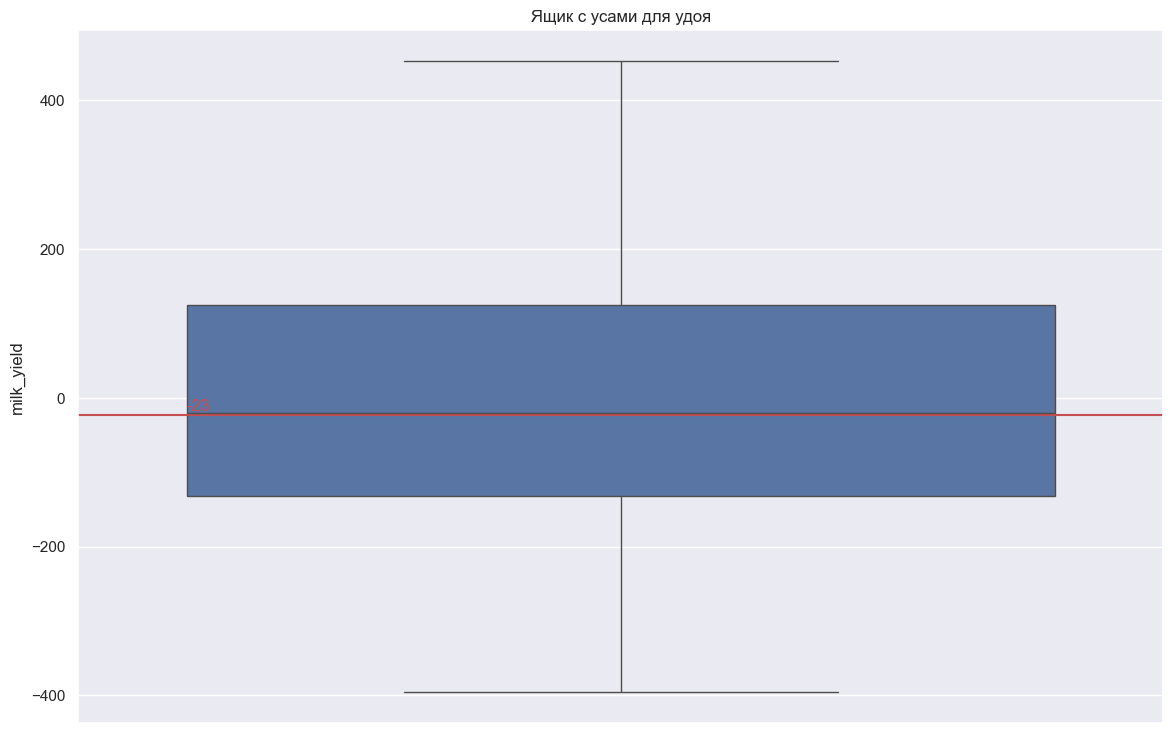

In [135]:
(sns.boxplot(data=predict_data_3, showfliers = False)
 .set_title('Ящик с усами для удоя'))
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.text(-0.4, -17, '-23', color='r')
plt.axhline(y=-23, color='r')

Построим гистограмму распределения.

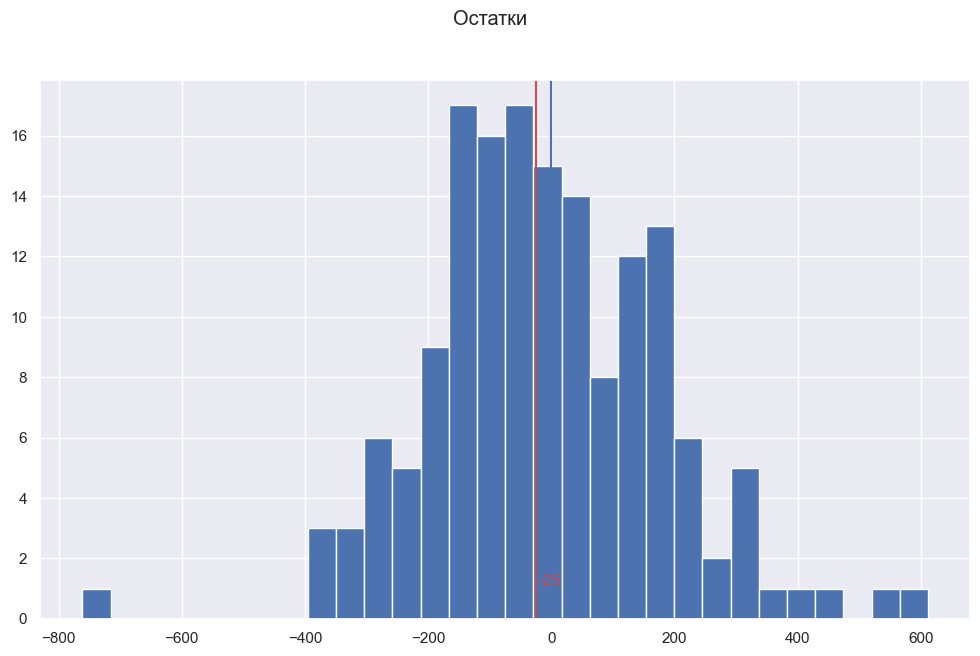

In [136]:
ax = (predict_data_3).hist(
    bins=30, 
    figsize=(12,7),
    grid=True
)
plt.axvline(x=0, color='b')
plt.axvline(x=-25.5, color='r')
plt.text(-23, 1.1, '-25', color='r')
plt.suptitle('Остатки');

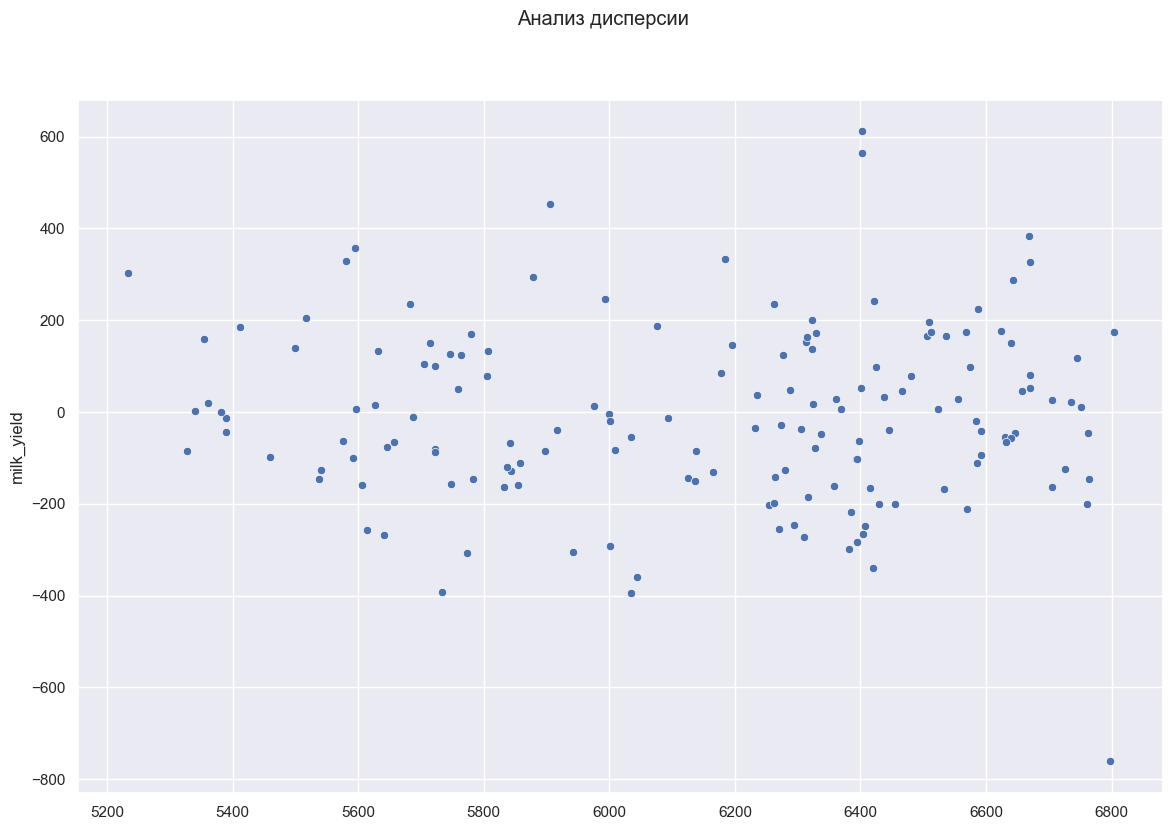

In [137]:
sns.scatterplot(x=predict_yield_3, y=y_test_yield_3 - predict_yield_3)
ax.set_xlabel('Предсказания')
ax.set_ylabel('Остатки')
plt.suptitle('Анализ дисперсии');

Пик около -22, для порядка удоя это около 0. Ящик с усами, процентили и гистограмма показывают, что распределение отличается от нормального, оно делает упор в положительную сторону. Имеются небольшие выбросы. Анализ дисперсии показывает, что остатки распределены равномерно.

### 2. Сравнение моделей на $R^2$ и остатков

Ещё раз выпишем метрики $R^2$

In [138]:
print('Метрика первой модели: ',r2_yield_1)
print('Метрика второй модели: ',r2_yield_2)
print('Метрика третьей модели: ',r2_yield_3)

Метрика первой модели:  0.7051689019103563
Метрика второй модели:  0.8118610885953732
Метрика третьей модели:  0.8181421686795927


Самое большое значение $R^2$ у третьей модели, однако разница незначительна.

### 3. Оценки качества моделей

Оценим метрику MSE для каждой модели

In [139]:
print('Метрика первой модели', mean_squared_error(y_test_yield, predict_yield_1))
print('Метрика второй модели', mean_squared_error(y_test_yield_2, predict_yield_2))
print('Метрика третьей модели', mean_squared_error(y_test_yield_3, predict_yield_3))

Метрика первой модели 60017.282016586796
Метрика второй модели 38298.490821452986
Метрика третьей модели 37019.88297707714


Метрики показывают, что наиболее точна третья модель.

Оценим метрику RMSE для каждой модели

In [140]:
print('Метрика первой модели', mean_squared_error(y_test_yield, predict_yield_1, squared=False))
print('Метрика второй модели', mean_squared_error(y_test_yield_2, predict_yield_2, squared=False))
print('Метрика третьей модели', mean_squared_error(y_test_yield_3, predict_yield_3, squared=False))

Метрика первой модели 244.98424850709645
Метрика второй модели 195.7000020987557
Метрика третьей модели 192.40551701309695


C:\Users\igsto\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\igsto\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\igsto\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Эта метрика также говорит о том, что третья модель точнее, однако вторая больше незначительно.

Оценим метрику MAE для каждой модели

In [141]:
print('Метрика первой модели', mean_absolute_error(y_test_yield, predict_yield_1))
print('Метрика второй модели', mean_absolute_error(y_test_yield_2, predict_yield_2))
print('Метрика третьей модели', mean_absolute_error(y_test_yield_3, predict_yield_3))

Метрика первой модели 189.33084901085348
Метрика второй модели 148.81112348524738
Метрика третьей модели 149.47402525078036


Эти метрики говорят о том, что во второй модели меньше всего выбросов и аномалий.

У первой модели $R^2$ не такой большой как у второй и третьей, поэтому она нам не подходит. Метрики RMSE у второй и третьей модели отличаются незначительно, также незначительно различается среднее. 

Необходимо выбрать лучшую модель, выбор между второй и третьей, у обеих метрики примерно одинаковые. Гистограмма и ящик с усами показывает, что распределение второй близко к нормальному, но у третьей распредедение относительно середины неравномерное, модель будет завышать предсказание, поэтому выберем вторую.

### 3. Прогноз удоя коров

Добавим в таблицу data_buy признаки ЭКО, СПО и сырой протеин, увеличив среднее признака на 5%.

In [142]:
data_buy['eau'] = [data_main['eau'].mean() * 1.05] * len(data_buy)
data_buy['spa'] = [data_main['spa'].mean() * 1.05] * len(data_buy)
data_buy['raw_protein'] = [data_main['raw_protein'].mean() * 1.05] * len(data_buy)

Введём новые признаки аналогично тем что мы делали в предыдущем датафрейме.

In [143]:
data_buy['spa_cat_two'] = data_buy['spa'].apply(lambda x: 'Меньше 0.91' if x<0.91 else 'Больше 0.91')
data_buy['spa_cat_two'].unique()

array(['Больше 0.91'], dtype=object)

In [144]:
data_buy['eau2'] = data_buy['eau'] ** 2

In [145]:
data_buy['fat_contant_cat'] = data_buy['fat_contant'].apply(lambda x: 'Меньше 3.56' if x<3.56 else 'От 3.56 до 3.67'
                                                             if x >= 3.56 and x < 3.67 else 'Больше 3.67')
data_buy['fat_contant_cat'].unique()

array(['От 3.56 до 3.67', 'Меньше 3.56', 'Больше 3.67'], dtype=object)

In [146]:
data_buy.head()

breed pasture_type dad_breed  dad_name  fat_contant  protein  \
0    Айдиал    Холмистое    Айдиал  Геркулес         3.58    3.076   
1    Айдиал    Равнинное   Соверин    Буйный         3.54    3.081   
2  Соверинг    Равнинное   Соверин     Барин         3.59    3.074   
3  Соверинг    Холмистое    Айдиал    Буйный         3.40    3.061   
4  Соверинг    Равнинное    Айдиал    Буйный         3.64    3.074   

              age  fat_contant_cat        eau       spa  raw_protein  \
0  Более двух лет  От 3.56 до 3.67  15.276162  0.958744  2019.947532   
1  Менее двух лет      Меньше 3.56  15.276162  0.958744  2019.947532   
2  Более двух лет  От 3.56 до 3.67  15.276162  0.958744  2019.947532   
3  Более двух лет      Меньше 3.56  15.276162  0.958744  2019.947532   
4  Более двух лет  От 3.56 до 3.67  15.276162  0.958744  2019.947532   

   spa_cat_two        eau2  
0  Больше 0.91  233.361138  
1  Больше 0.91  233.361138  
2  Больше 0.91  233.361138  
3  Больше 0.91  233.361138  
4  Больше 0.91  233.361138

Введём список качественных и количественных переменных.

In [147]:
quant_col_names_buy = quant_col_names_2 
cat_col_names_buy = cat_col_names_2
all_col_names_buy = quant_col_names_buy + cat_col_names_buy

Получим предсказание второй модели для датафрейма data_buy, для чего масштабируем количественные признаки и закодируем качественные.

Кодируем качественные.

In [148]:
X_buy_cat = encoder_yield_2.transform(data_buy[cat_col_names_buy]) 

encoder_col_names = encoder_yield_2.get_feature_names_out() 

X_buy_cat = pd.DataFrame(X_buy_cat, columns=encoder_col_names)


Трансформируем количественные признаки.

In [149]:
X_buy_quant = scaler_yield_2.transform(data_buy[quant_col_names_buy])

X_buy_quant = pd.DataFrame(X_buy_quant, columns=quant_col_names_buy)

Объединим таблицы.

In [150]:
X_buy = pd.concat([X_buy_quant, X_buy_cat], axis=1)

Сделаем предсказания

In [151]:
X_buy['milk_yield'] = model_lr_yield_2.predict(X_buy)

In [152]:
data_buy['milk_yield'] = X_buy['milk_yield']

Составим список коров, удой которых больше 6000 кг в год

In [153]:
X_buy.loc[X_buy['milk_yield'] >= 6000, 'milk_yield']

0     6393.166762
2     6086.419833
3     6345.060791
4     6326.792150
6     6393.166762
7     6095.018812
8     6086.419833
9     6114.502960
10    6386.983799
11    6320.609187
12    6627.356116
14    6086.419833
15    6345.060791
16    6386.983799
17    6090.051356
18    6055.511821
19    6326.792150
Name: milk_yield, dtype: float64

Найдём количество коров с таким удоем.

In [154]:
len(X_buy[X_buy['milk_yield'] >= 6000])

17

Вывод.
Мы создали три модели линейной регрессии. Первая модель даёт предсказания хуже последующих двух. Анализ метрик показал, что вторая и третья модель близки по предсказаниям, однако анализ остатков показал, что вторая модель лучше, поэтому я выбрал её. Предсказание модели показало, что фермеру подходят 17 коров из списка.

## Часть 6. Обучение модели логистической регрессии

### 1. Подготовка данных и обучение модели

Как и в случае с линейной регрессией необходимо отобрать признаки, которые подойдут для создания модели. Среди признаков надо выделить такие, которые влияют на химический состав молока, поэтому перечислим признаки:
1. СПО
2. Тип пастбища
3. Жирность
4. Белок
5. Порода
6. Порода папы быка
7. Имя папы

Для нахождения признаков ещё раз посмотрим на матрицу корреляции, закодировав перед этим столбец вкус молока.

In [155]:
encode_for_taste = LabelEncoder()
encode_for_taste.fit(data_main_dad['milk_taste'])
data_main_dad['milk_taste_bool'] = encode_for_taste.transform(data_main_dad['milk_taste'])

Необходимо кодировать так, чтоб вкусно было равно 1, а невкусно 0. Проверим это соотнеся длины двух столбцов.

In [156]:
len(data_main_dad[data_main_dad['milk_taste']=='Вкусно'])

370

In [157]:
len(data_main_dad[data_main_dad['milk_taste_bool']==1])

258

Инвертируем признаки.

In [158]:
data_main_dad['milk_taste_bool'] = 1 - data_main_dad['milk_taste_bool']
len(data_main_dad[data_main_dad['milk_taste_bool']==1])

370

Посмотрим ещё раз на матрицу корреляции.

C:\Users\igsto\anaconda3\Lib\site-packages\phik\phik.py:150: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


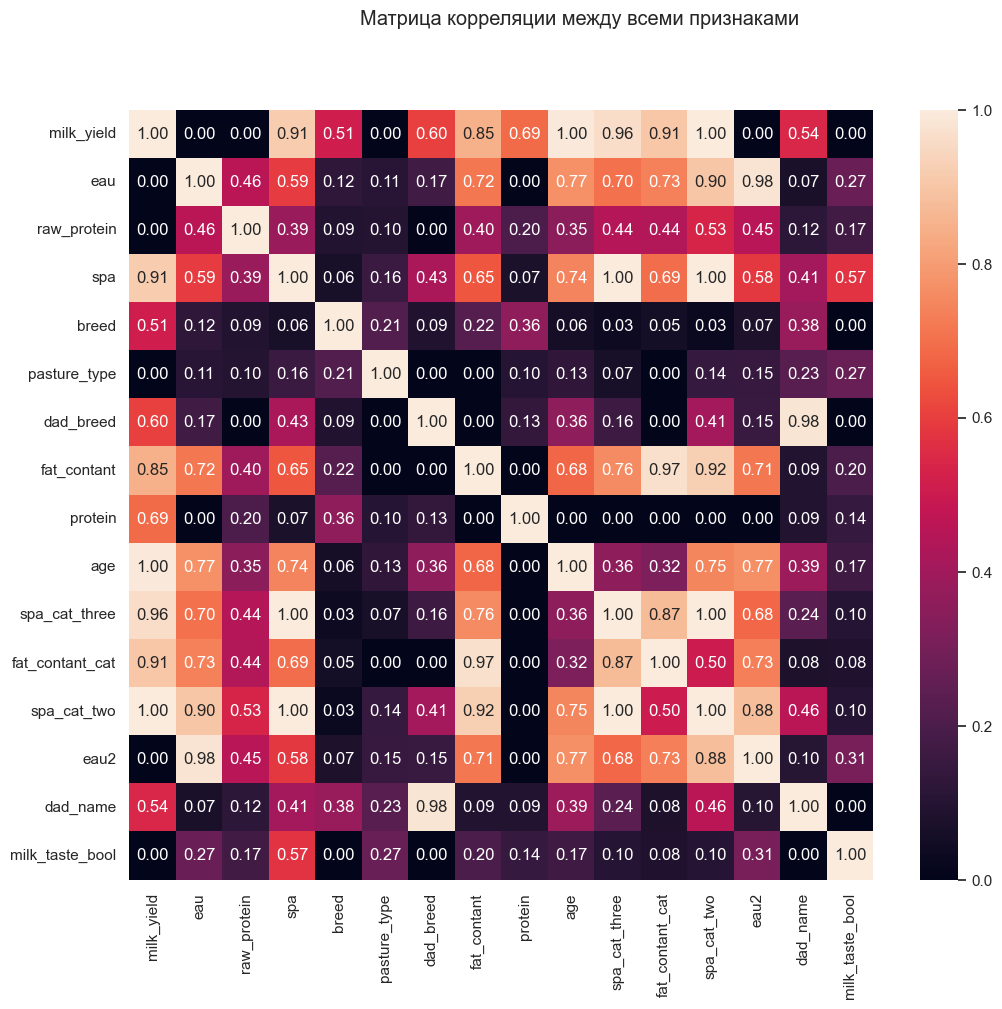

In [159]:
quant_names_for_lr = ['eau', 'raw_protein', 'spa', 'fat_contant', 'protein', 'eau2']

cm_log = data_main_dad.drop(['id', 'milk_taste'], axis=1).phik_matrix(interval_cols=quant_names_for_lr)

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции между всеми признаками')
sns.heatmap(cm_log, annot=True, fmt='.2f');

Матрица корреляции показывает, что переменная вкус молока имеет корреляцию больше 0.5 только с признаком СПО. Логично предположить, что на вкус молока влияет его химический состав, следовательно надо отобрать только такие признаки, которые на него влияют. 

В качестве целевого признака возьмём всё кроме удоя и породы папы (так как высокая корреляция с именем папы).

In [160]:
data_spa = data_main_dad.drop(['id', 'milk_yield', 'milk_taste', 
                               'spa_cat_three',  'spa_cat_two', 'fat_contant_cat', 'eau2', 'dad_breed'], axis=1)
data_spa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eau              628 non-null    float64
 1   raw_protein      628 non-null    int64  
 2   spa              628 non-null    float64
 3   breed            628 non-null    object 
 4   pasture_type     628 non-null    object 
 5   fat_contant      628 non-null    float64
 6   protein          628 non-null    float64
 7   age              628 non-null    object 
 8   dad_name         628 non-null    object 
 9   milk_taste_bool  628 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(4)
memory usage: 46.7+ KB


Построим матрицу корреляции.

In [161]:
quant_col_names_4 = ['eau', 'raw_protein', 'spa', 'fat_contant', 'protein']
cat_col_names_4 = ['breed', 'pasture_type', 'age', 'dad_name']
all_col_names_4 = quant_col_names_4 + cat_col_names_4

C:\Users\igsto\anaconda3\Lib\site-packages\phik\phik.py:150: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


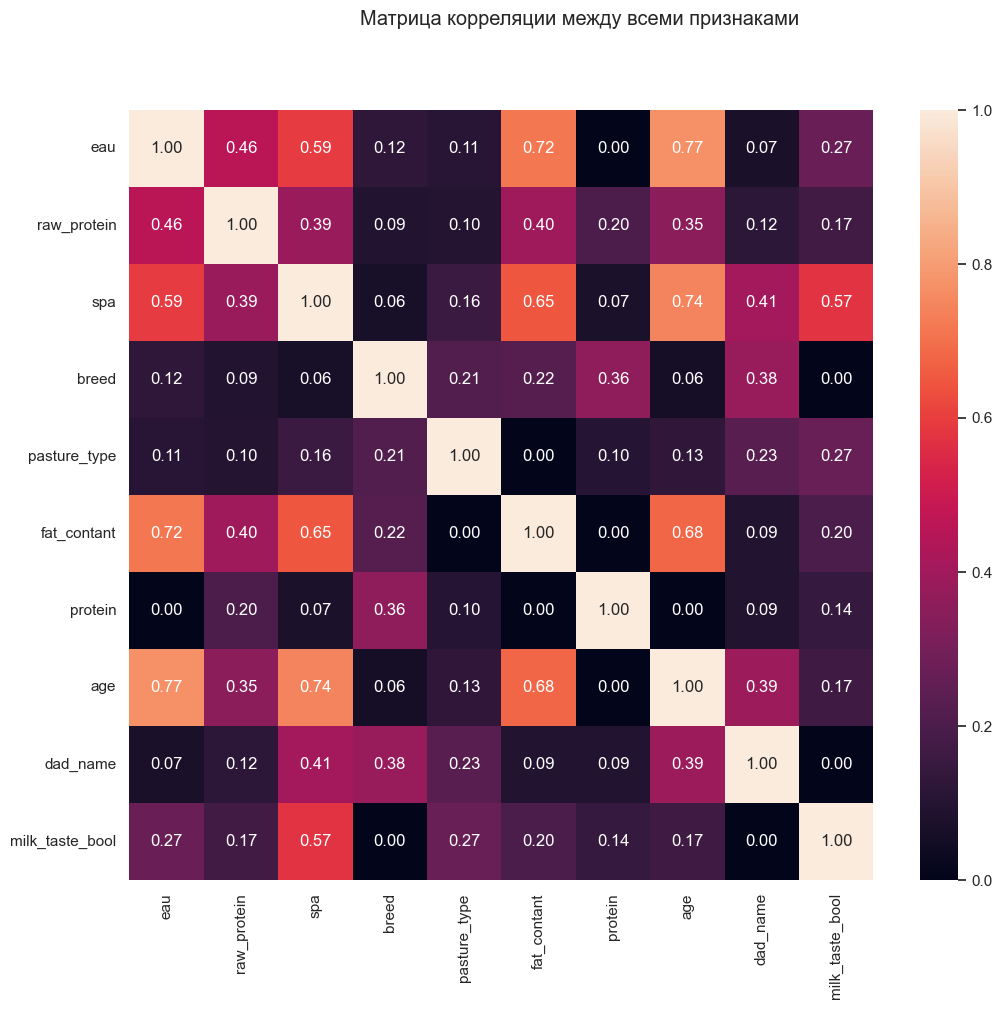

In [162]:
cm_log_spa = data_spa.phik_matrix(interval_cols=quant_col_names_4)

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции между всеми признаками')
sns.heatmap(cm_log_spa, annot=True, fmt='.2f');

Создадим модель логистической регрессии.

In [163]:
#cat_col_names_4.remove('breed')
#cat_col_names_4.remove('dad_name')
#cat_col_names_4.remove('age')
#quant_col_names_4.remove('eau')

#Разделим данные на тренировочную и тестовую выборку
X_train_taste, X_test_taste, y_train_taste, y_test_taste = train_test_split(
    data_spa.drop('milk_taste_bool', axis=1),
    data_spa['milk_taste_bool'],
    random_state=RANDOM_STATE
)
#закодируем категориальные признаки
X_train_ohe_taste, X_test_ohe_taste, encoder_yield_taste = get_cat(X_train_taste, X_test_taste, cat_col_names_4)

#масштабируем количественные признаки
X_train_scaler_taste, X_test_scaler_taste, scaler_yield_taste = get_quant(X_train_taste, X_test_taste, quant_col_names_4)

#объединим данные
X_train_all_taste = pd.concat([X_train_scaler_taste, X_train_ohe_taste], axis=1)
X_test_all_taste = pd.concat([X_test_scaler_taste, X_test_ohe_taste], axis=1)

#инициализируем и обучим модель
clf = LogisticRegression()
clf = clf.fit(X_train_all_taste, y_train_taste);

#сделаем предсказание
predict_taste = clf.predict(X_test_all_taste)

Рассчитаем метрики для предсказания.

Метрика accuracy

In [164]:
accuracy_taste = accuracy_score(y_test_taste, predict_taste)
accuracy_taste

0.6114649681528662

Метрика precision

In [165]:
precision_taste = precision_score(y_test_taste, predict_taste)
precision_taste

0.6097560975609756

Метрика recall

In [166]:
recall_taste = recall_score(y_test_taste, predict_taste)
recall_taste

0.8522727272727273

Построим матрицу ошибок.

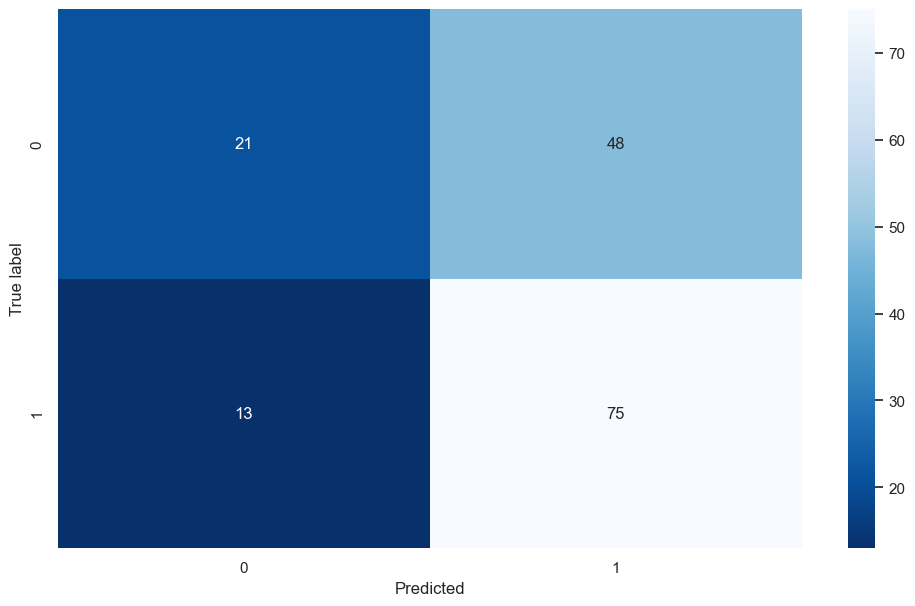

In [167]:
cm = confusion_matrix(y_test_taste, predict_taste)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

### 2. Анализ логистической регрессии

Необходимо выяснить, какая метрика больше подходит для задачи. Необходимо, чтобы молоко было вкусным, из чего следует, что всякое подозрение на невкусное молоко должно тут же отбрасываться, поэтому следует уменьшить ошибку первого рода, то есть всякое подозрение на невкусное молоко должно отбрасываться, получается нужна метрика precision. 

Найдём пороговое значение, сведя ошибку первого рода к минимуму, для чего подберём порог.

In [168]:
thresholds = [round(i,2) for i in np.linspace(0.01,1,num = 60,endpoint=False)]

y_proba = clf.predict_proba(X_test_all_taste)[:,1]

data_proba = pd.DataFrame(zip(y_test_taste, y_proba),
             columns = ['y_valid', 'y_proba'])#.sort_values(by='y_proba',ascending=False)
data_proba.head()

y_valid   y_proba
0        1  0.543856
1        1  0.687347
2        1  0.561957
3        0  0.399112
4        1  0.692382

In [169]:
#columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    #columns.append('y_pred_'+str(i))
    data_proba['y_pred_'+str(i)] = data_proba['y_proba'].apply( lambda x: 1 if x>=i else 0)
    print('Порог: ', i, 'precision: ', precision_score(y_test_taste, data_proba['y_pred_'+str(i)]))
    #print('Порог: ', i, 'recall: ', recall_score(y_test_taste, data_proba['y_pred_'+str(i)]))

Порог:  0.01 precision:  0.5605095541401274
Порог:  0.03 precision:  0.5605095541401274
Порог:  0.04 precision:  0.5605095541401274
Порог:  0.06 precision:  0.5605095541401274
Порог:  0.08 precision:  0.5605095541401274
Порог:  0.09 precision:  0.5605095541401274
Порог:  0.11 precision:  0.5605095541401274
Порог:  0.13 precision:  0.5605095541401274
Порог:  0.14 precision:  0.5605095541401274
Порог:  0.16 precision:  0.5605095541401274
Порог:  0.18 precision:  0.5605095541401274
Порог:  0.19 precision:  0.5605095541401274
Порог:  0.21 precision:  0.5605095541401274
Порог:  0.22 precision:  0.5605095541401274
Порог:  0.24 precision:  0.5641025641025641
Порог:  0.26 precision:  0.5641025641025641
Порог:  0.27 precision:  0.567741935483871
Порог:  0.29 precision:  0.564935064935065
Порог:  0.31 precision:  0.5686274509803921
Порог:  0.32 precision:  0.5686274509803921
Порог:  0.34 precision:  0.5657894736842105
Порог:  0.36 precision:  0.5695364238410596
Порог:  0.37 precision:  0.5771812

C:\Users\igsto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\igsto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\igsto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\igsto\anaconda3\Lib\site-packages\sklearn\metrics\_clas

Метрика precision растёт до значения 0.77, после чего убывает, поэтому рассмотрим метрику тщательнее на промежутке от 0.74 до 0.77.

Метрика достигает пика при пороге 0.76, после чего опять убывает, поэтому будет достаточно, если порог будет на значении 0.76.

Рассмотрим промежуток от 0.78 до 0.83 тщательнее.

In [190]:
thresholds_new = [round(i,7) for i in np.linspace(0.78, 0.83,num = 55,endpoint=True)]
#[round(i,2) for i in np.linspace(0.01,1,num = 60,endpoint=False)]
for i in thresholds_new:
    #columns.append('y_pred_'+str(i))
    data_proba['y_pred_'+str(i)] = data_proba['y_proba'].apply( lambda x: 1 if x>=i else 0)
    print('Порог: ', i, 'precision: ', precision_score(y_test_taste, data_proba['y_pred_'+str(i)]))

Порог:  0.78 precision:  0.8461538461538461
Порог:  0.7809259 precision:  0.8461538461538461
Порог:  0.7818519 precision:  0.8461538461538461
Порог:  0.7827778 precision:  0.8461538461538461
Порог:  0.7837037 precision:  0.8461538461538461
Порог:  0.7846296 precision:  0.8333333333333334
Порог:  0.7855556 precision:  0.8181818181818182
Порог:  0.7864815 precision:  0.8181818181818182
Порог:  0.7874074 precision:  0.8181818181818182
Порог:  0.7883333 precision:  0.8181818181818182
Порог:  0.7892593 precision:  0.8181818181818182
Порог:  0.7901852 precision:  0.8181818181818182
Порог:  0.7911111 precision:  0.8181818181818182
Порог:  0.792037 precision:  0.8
Порог:  0.792963 precision:  0.7777777777777778
Порог:  0.7938889 precision:  0.75
Порог:  0.7948148 precision:  0.75
Порог:  0.7957407 precision:  0.75
Порог:  0.7966667 precision:  0.75
Порог:  0.7975926 precision:  0.7142857142857143
Порог:  0.7985185 precision:  0.6666666666666666
Порог:  0.7994444 precision:  0.6666666666666666


C:\Users\igsto\AppData\Local\Temp\ipykernel_9628\2596437529.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_proba['y_pred_'+str(i)] = data_proba['y_proba'].apply( lambda x: 1 if x>=i else 0)
C:\Users\igsto\AppData\Local\Temp\ipykernel_9628\2596437529.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_proba['y_pred_'+str(i)] = data_proba['y_proba'].apply( lambda x: 1 if x>=i else 0)
C:\Users\igsto\AppData\Local\Temp\ipykernel_9628\2596437529.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually

### 3. Оценка вкуса

Применим модель к тестовой выборке и установим порог.

Масштабируем количественные признаки.

In [170]:
X_buy_quant_taste = scaler_yield_taste.transform(data_buy[quant_col_names_4])

X_buy_quant_taste = pd.DataFrame(X_buy_quant_taste, columns=quant_col_names_4)

Кодируем категориальные.

In [171]:
X_buy_cat_taste = encoder_yield_taste.transform(data_buy[cat_col_names_4])
encoder_col_names = encoder_yield_taste.get_feature_names_out() 

X_buy_cat_taste = pd.DataFrame(X_buy_cat_taste, columns=encoder_col_names)

Объединим датафреймы.

In [172]:
X_buy_taste = pd.concat([X_buy_quant_taste, X_buy_cat_taste], axis=1)
X_buy_taste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   eau                     20 non-null     float64
 1   raw_protein             20 non-null     float64
 2   spa                     20 non-null     float64
 3   fat_contant             20 non-null     float64
 4   protein                 20 non-null     float64
 5   breed_Соверинг          20 non-null     float64
 6   pasture_type_Холмистое  20 non-null     float64
 7   age_Менее двух лет      20 non-null     float64
 8   dad_name_Буйный         20 non-null     float64
 9   dad_name_Геркулес       20 non-null     float64
 10  dad_name_Соловчик       20 non-null     float64
dtypes: float64(11)
memory usage: 1.8 KB


Сделаем предсказание.

In [173]:
X_buy_taste['milk_taste_bool'] = clf.predict(X_buy_taste)
data_buy['milk_taste_bool']  = X_buy_taste['milk_taste_bool'] 

Создадим таблицу где указано на сколько процентов предсказание определяет вкус молока.

In [174]:
y_proba_buy = clf.predict_proba(X_buy_taste.drop('milk_taste_bool', axis=1))[:,1]

data_proba_buy = pd.DataFrame(zip(data_buy['milk_taste_bool'], y_proba_buy),
             columns = ['y_valid', 'y_proba'])#.sort_values(by='y_proba',ascending=False)
data_proba_buy.head()

y_valid   y_proba
0        1  0.767554
1        1  0.740484
2        1  0.689249
3        0  0.478088
4        1  0.610805

Применим пороговое значение.

In [191]:
data_buy['milk_taste_bool'] = data_proba_buy['y_proba'].apply(lambda x: 1 if x>=0.8077778 else 0)
data_buy['milk_taste_bool']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: milk_taste_bool, dtype: int64

Посмотрим на количество коров, которые дают вкусное молоко.

In [192]:
len(data_buy.query('milk_taste_bool==1'))

1

## Часть 7. Итоговые выводы

### Прогноз коров с необходимым удоем и вкусным молоком.

Получим список коров, которые подходят фермеру.

In [193]:
data_buy_good = data_buy.query('milk_yield>=6000 and milk_taste_bool==1')
data_buy_good

breed pasture_type dad_breed dad_name  fat_contant  protein  \
9  Соверинг    Холмистое    Айдиал   Буйный          3.4    3.079   

              age fat_contant_cat        eau       spa  raw_protein  \
9  Менее двух лет     Меньше 3.56  15.276162  0.958744  2019.947532   

   spa_cat_two        eau2  milk_yield  milk_taste_bool  
9  Больше 0.91  233.361138  6114.50296                1

Результаты моделей показывают, что фермер может купить себе одну корову.

### Анализ линейной регрессии.

Было рассмотрено три модели. Первая рассматривает исходные признаки и не добавляет новые, из всех трёх она самая худшая, однако её пик около 0, но распределение не похоже на нормальное. Во второй я создал несколько новых признаков, такие как СПО категориальный и жирность категориальный, она работала уже лучше. В третьей модели я добавил признак имя папы, в целом она не отличается от второй. Вторая и третья модели довольно похожи по метрикам, однако была выбрана вторая так как гистограмма и ящик с усами показывают, что распределение относительно ровная, в то время как третья смещена вправо. Предсказание второй модели показало, что 17 коров будут давать нужное количество молока в год. Думаю признаков достаточно, нет необходимости добавлять что-то новое.

### Анализ логистической регрессии.

Было трудно отобрать нужные признаки, так как коэффициент корреляции для многих был очень маленьким. В качестве метрики была выбрана precision, так как необходимо было уменьшить ошибку первого рода. Прогноз показал, что вкусное молоко будет у одной коровы. Для лучшей работы модели было бы неплохо знать химический состав корма, не досконально какие молекулы там существуют, но хотя бы сырой жир, сырой крахмал и т.д.